# Importing Libraries and Reading Data

Import the necessary libraries, such as pandas, re, matplotlib.pyplot, plotly.express, and plotly.graph_objects.
Import the necessary libraries for topic modeling: CountVectorizer from sklearn.feature_extraction.text, LatentDirichletAllocation and NMF from sklearn.decomposition.
Read the CSV file using pandas and inspect the data using the info() method.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chatgpt_daily_tweets.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22002 entries, 0 to 22001
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              22002 non-null  object 
 1   tweet_created         22002 non-null  object 
 2   tweet_extracted       22002 non-null  object 
 3   text                  22002 non-null  object 
 4   lang                  22002 non-null  object 
 5   user_id               22002 non-null  object 
 6   user_name             22000 non-null  object 
 7   user_username         22002 non-null  object 
 8   user_location         13048 non-null  object 
 9   user_description      18526 non-null  object 
 10  user_created          21998 non-null  object 
 11  user_followers_count  21996 non-null  float64
 12  user_following_count  21996 non-null  float64
 13  user_tweet_count      21996 non-null  float64
 14  user_verified         21996 non-null  object 
 15  source             

# Cleaning the Text Data

Convert the 'text' column to string type.
Remove unwanted characters from the 'text' column using regular expressions.
Convert the 'text' column to lowercase.

In [4]:
import pandas as pd
import re

# Convert content column to string type
df['text'] = df['text'].astype(str)

# Remove unwanted characters from content column
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

# Show cleaned content column
print(df['text'])

0                             RT jexep  ChatGPT           
1                        ChatGPTChrome4 httpstcohfacFe570t
2        RT DarrellLerner ChatGPT Plugins are the faste...
3        Get an intelligent chatbot for your website in...
4        Hey Guys ZenithSwap has launched at just  5500...
                               ...                        
21997    RT JaimeRibaFer Detrs del ChatGPT httpstcoMDnW...
21998    RT sudosuberenu   Os presento una de las nueva...
21999    RT pmphillips The dangerous misuse of facts an...
22000    RT IGNJapan AI424Steam\nhttpstcoH99IBeGCEf\n\n...
22001    ChatGPT wrote the entire script for this video...
Name: text, Length: 22002, dtype: object


In [5]:
import pandas as pd

# Convert text column to lowercase
df['text'] = df['text'].str.lower()

# Show lowercase text column
print(df['text'])


0                             rt jexep  chatgpt           
1                        chatgptchrome4 httpstcohfacfe570t
2        rt darrelllerner chatgpt plugins are the faste...
3        get an intelligent chatbot for your website in...
4        hey guys zenithswap has launched at just  5500...
                               ...                        
21997    rt jaimeribafer detrs del chatgpt httpstcomdnw...
21998    rt sudosuberenu   os presento una de las nueva...
21999    rt pmphillips the dangerous misuse of facts an...
22000    rt ignjapan ai424steam\nhttpstcoh99ibegcef\n\n...
22001    chatgpt wrote the entire script for this video...
Name: text, Length: 22002, dtype: object


# Removing Stop Words

Import the nltk library and download the stopwords corpus if necessary.
Remove stop words from the 'text' column using a list comprehension.

In [6]:
import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words to remove
stop_words = set(stopwords.words('english'))

# Remove stop words from text column
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Show text column without stop words
print(df['text'])

0                                         rt jexep chatgpt
1                        chatgptchrome4 httpstcohfacfe570t
2        rt darrelllerner chatgpt plugins fastest way g...
3        get intelligent chatbot website minutes chatba...
4        hey guys zenithswap launched 55000 usd marketc...
                               ...                        
21997    rt jaimeribafer detrs del chatgpt httpstcomdnw...
21998    rt sudosuberenu os presento una de las nuevas ...
21999    rt pmphillips dangerous misuse facts fiction c...
22000    rt ignjapan ai424steam httpstcoh99ibegcef port...
22001    chatgpt wrote entire script video 2023 tesla m...
Name: text, Length: 22002, dtype: object


# Tokenizing the Text

Tokenize the 'text' column using the nltk word_tokenize function.

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize text column
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

# Show tokenized text column
print(df['text'])

0                                     [rt, jexep, chatgpt]
1                     [chatgptchrome4, httpstcohfacfe570t]
2        [rt, darrelllerner, chatgpt, plugins, fastest,...
3        [get, intelligent, chatbot, website, minutes, ...
4        [hey, guys, zenithswap, launched, 55000, usd, ...
                               ...                        
21997    [rt, jaimeribafer, detrs, del, chatgpt, httpst...
21998    [rt, sudosuberenu, os, presento, una, de, las,...
21999    [rt, pmphillips, dangerous, misuse, facts, fic...
22000    [rt, ignjapan, ai424steam, httpstcoh99ibegcef,...
22001    [chatgpt, wrote, entire, script, video, 2023, ...
Name: text, Length: 22002, dtype: object


# Removing Duplicate Rows

Drop duplicate rows based on the 'text' column using the drop_duplicates() method.

In [8]:
import pandas as pd

# Drop duplicate rows based on the 'text' column
df = df.drop_duplicates(subset='text', keep='first')

# Print the DataFrame without duplicate rows
df

tweet_id              tweet_created  \
0       1.642889622681432e+18  2023-04-03 13:59:44+00:00   
1      1.6428442314496123e+18  2023-04-03 10:59:22+00:00   
2      1.6427385624866693e+18  2023-04-03 03:59:28+00:00   
3      1.6429198880616448e+18  2023-04-03 15:59:59+00:00   
4       1.642708351690711e+18  2023-04-03 01:59:25+00:00   
...                       ...                        ...   
21996     1649563420104982529  2023-04-21 23:59:01+00:00   
21997     1649367309473947648  2023-04-21 10:59:44+00:00   
21998     1649397431417618433  2023-04-21 12:59:26+00:00   
21999     1649367340394639360  2023-04-21 10:59:52+00:00   
22001     1649442794136821762  2023-04-21 15:59:41+00:00   

                  tweet_extracted  \
0      2023-04-08 01:07:02.538242   
1      2023-04-08 01:06:59.379927   
2      2023-04-08 01:06:52.504868   
3      2023-04-08 01:07:04.742617   
4      2023-04-08 01:06:50.638068   
...                           ...   
21996  2023-04-23 21:55:12.433659   
21997  2023-04-23 21:54:57.771378   
21998  2023-04-23 21:54:59.709232   
21999  2023-04-23 21:54:57.771378   
22001  2023-04-23 21:55:03.075298   

                                                    text lang  \
0                                   [rt, jexep, chatgpt]   th   
1                   [chatgptchrome4, httpstcohfacfe570t]   ja   
2      [rt, darrelllerner, chatgpt, plugins, fastest,...   en   
3      [get, intelligent, chatbot, website, minutes, ...   en   
4      [hey, guys, zenithswap, launched, 55000, usd, ...   en   
...                                                  ...  ...   
21996  [rt, juanvirguezzz, hoy, descubr, chatgpt, lit...   es   
21997  [rt, jaimeribafer, detrs, del, chatgpt, httpst...   es   
21998  [rt, sudosuberenu, os, presento, una, de, las,...   es   
21999  [rt, pmphillips, dangerous, misuse, facts, fic...   en   
22001  [chatgpt, wrote, entire, script, video, 2023, ...   en   

                   user_id           user_name    user_username  \
0               4706577259          👷🏼 ♡ #GOT7      BPawarisa1a   
1               2264288640             ミミズクりんゆ     DRVO_Project   
2               2383245894                  pk  pradeep42329225   
3      1633040597782081537            AR Leyva     ArrheniusLey   
4      1311403370670960640  Human Being 🇨🇳🇸🇬🇻🇳  KiarostamiBeing   
...                    ...                 ...              ...   
21996             98294750                Re:+        Re_0_tasu   
21997  1102965122157502465      letiziaanton ø         letuqui2   
21998           1627989596        SEO Internet      SEO1nternet   
21999             14224517      Mathews George       mtwsgeorge   
22001  1378194329492094977            ChargeGo    ChargeGoGroup   

         user_location                                   user_description  \
0      ในใจJacksonwang  @JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...   
1                東京←岐阜  料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...   
2                India                             💐💐।।जय श्री महाकाल।।💐💐   
3       United Kingdom  Passionate about AI and its potential to trans...   
4          Chicago, IL  Freedom is the Recognition of Necessity • Mark...   
...                ...                                                ...   
21996            レタス牧場                                            皆大好きれたす   
21997              NaN                                                NaN   
21998            Paris  Geek, référencement naturel SEO, SMO,SEM. Pour...   
21999              NaN  Theology | Science and Religion | Psychology |...   
22001     Los Angeles   We mostly make cool and funny videos with/abou...   

                    user_created  user_followers_count  user_following_count  \
0      2016-01-04 02:27:33+00:00                1293.0                 445.0   
1      2013-12-27 12:39:07+00:00                7878.0                4941.0   
2      2014-03-11 06:04:10+00:00                 269.0                4141.0   
3      2023-03-07 09:43:

# Stemming and Lemmatizing

Import the nltk libraries for stemming and lemmatizing.
Create a stemmer and lemmatizer.
Apply stemming and lemmatization to the tokenized text and create new columns for the stemmed and lemmatized versions of the text.

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Create stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stem each word in the tokenized text and join them back into a string
df['stemmed_text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

# Lemmatize each word in the tokenized text and join them back into a string
df['lemmatized_text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

# Show the first few rows of the dataframe with the new columns
df.head()

tweet_id              tweet_created  \
0   1.642889622681432e+18  2023-04-03 13:59:44+00:00   
1  1.6428442314496123e+18  2023-04-03 10:59:22+00:00   
2  1.6427385624866693e+18  2023-04-03 03:59:28+00:00   
3  1.6429198880616448e+18  2023-04-03 15:59:59+00:00   
4   1.642708351690711e+18  2023-04-03 01:59:25+00:00   

              tweet_extracted  \
0  2023-04-08 01:07:02.538242   
1  2023-04-08 01:06:59.379927   
2  2023-04-08 01:06:52.504868   
3  2023-04-08 01:07:04.742617   
4  2023-04-08 01:06:50.638068   

                                                text lang  \
0                               [rt, jexep, chatgpt]   th   
1               [chatgptchrome4, httpstcohfacfe570t]   ja   
2  [rt, darrelllerner, chatgpt, plugins, fastest,...   en   
3  [get, intelligent, chatbot, website, minutes, ...   en   
4  [hey, guys, zenithswap, launched, 55000, usd, ...   en   

               user_id           user_name    user_username    user_location  \
0           4706577259          👷🏼 ♡ #GOT7      BPawarisa1a  ในใจJacksonwang   
1           2264288640             ミミズクりんゆ     DRVO_Project            東京←岐阜   
2           2383245894                  pk  pradeep42329225            India   
3  1633040597782081537            AR Leyva     ArrheniusLey   United Kingdom   
4  1311403370670960640  Human Being 🇨🇳🇸🇬🇻🇳  KiarostamiBeing      Chicago, IL   

                                    user_description  ...  \
0  @JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...  ...   
1  料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...  ...   
2                             💐💐।।जय श्री महाकाल।।💐💐  ...   
3  Passionate about AI and its potential to trans...  ...   
4  Freedom is the Recognition of Necessity • Mark...  ...   

  user_following_count  user_tweet_count  user_verified  source retweet_count  \
0                445.0           87051.0          False     NaN       13640.0   
1               4941.0           76597.0          False     NaN           0.0   
2               4141.0            3816.0          False     NaN         628.0   
3                 24.0             198.0          False     NaN           0.0   
4                419.0           12949.0          False     NaN           0.0   

   like_count  reply_count  impression_count  \
0         0.0          0.0               0.0   
1         0.0          0.0             290.0   
2         0.0          0.0               0.0   
3         0.0          0.0              58.0   
4         0.0          0.0               0.0   

                                        stemmed_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllern chatgpt plugin fastest way get ...   
3  get intellig chatbot websit minut chatbas ai t...   
4  hey guy zenithswap launch 55000 usd marketcap ...   

                                     lemmatized_text  
0                                   rt jexep chatgpt  
1                  chatgptchrome4 httpstcohfacfe570t  
2  rt darrelllerner chatgpt plugins fastest way g...  
3  get intelligent chatbot website minute chatbas...  
4  hey guy zenithswap launched 55000 usd marketca...  

[5 rows x 22 columns]

# Sentiment Analysis

Import the SentimentIntensityAnalyzer from the nltk.sentiment.vader module.
Instantiate the SentimentIntensityAnalyzer.
Define a function to calculate the sentiment score for each tweet.
Apply the function to the stemmed and lemmatized text columns and create new columns for the sentiment scores.

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader lexicon if not already present
# nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score for each tweet
def get_sentiment_score(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    return sentiment['compound']

# Apply the function to the tokenized text column to get the sentiment score for each tweet
df['sentiment_score_stemmed_text'] = df['stemmed_text'].apply(lambda x: get_sentiment_score(x))
df['sentiment_score_lemmatized_text'] = df['lemmatized_text'].apply(lambda x: get_sentiment_score(x))

# Show the dataframe with the sentiment score column
df.head()

tweet_id              tweet_created  \
0   1.642889622681432e+18  2023-04-03 13:59:44+00:00   
1  1.6428442314496123e+18  2023-04-03 10:59:22+00:00   
2  1.6427385624866693e+18  2023-04-03 03:59:28+00:00   
3  1.6429198880616448e+18  2023-04-03 15:59:59+00:00   
4   1.642708351690711e+18  2023-04-03 01:59:25+00:00   

              tweet_extracted  \
0  2023-04-08 01:07:02.538242   
1  2023-04-08 01:06:59.379927   
2  2023-04-08 01:06:52.504868   
3  2023-04-08 01:07:04.742617   
4  2023-04-08 01:06:50.638068   

                                                text lang  \
0                               [rt, jexep, chatgpt]   th   
1               [chatgptchrome4, httpstcohfacfe570t]   ja   
2  [rt, darrelllerner, chatgpt, plugins, fastest,...   en   
3  [get, intelligent, chatbot, website, minutes, ...   en   
4  [hey, guys, zenithswap, launched, 55000, usd, ...   en   

               user_id           user_name    user_username    user_location  \
0           4706577259          👷🏼 ♡ #GOT7      BPawarisa1a  ในใจJacksonwang   
1           2264288640             ミミズクりんゆ     DRVO_Project            東京←岐阜   
2           2383245894                  pk  pradeep42329225            India   
3  1633040597782081537            AR Leyva     ArrheniusLey   United Kingdom   
4  1311403370670960640  Human Being 🇨🇳🇸🇬🇻🇳  KiarostamiBeing      Chicago, IL   

                                    user_description  ... user_verified  \
0  @JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...  ...         False   
1  料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...  ...         False   
2                             💐💐।।जय श्री महाकाल।।💐💐  ...         False   
3  Passionate about AI and its potential to trans...  ...         False   
4  Freedom is the Recognition of Necessity • Mark...  ...         False   

   source  retweet_count  like_count reply_count  impression_count  \
0     NaN        13640.0         0.0         0.0               0.0   
1     NaN            0.0         0.0         0.0             290.0   
2     NaN          628.0         0.0         0.0               0.0   
3     NaN            0.0         0.0         0.0              58.0   
4     NaN            0.0         0.0         0.0               0.0   

                                        stemmed_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllern chatgpt plugin fastest way get ...   
3  get intellig chatbot websit minut chatbas ai t...   
4  hey guy zenithswap launch 55000 usd marketcap ...   

                                     lemmatized_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllerner chatgpt plugins fastest way g...   
3  get intelligent chatbot website minute chatbas...   
4  hey guy zenithswap launched 55000 usd marketca...   

   sentiment_score_stemmed_text  sentiment_score_lemmatized_text  
0                        0.0000                           0.0000  
1                        0.0000                           0.0000  
2                        0.5574                           0.6808  
3                        0.0000                           0.7096  
4                       -0.2732                          -0.1531  

[5 rows x 24 columns]

# Analyzing Sentiment Scores

Calculate the mean sentiment score for the stemmed and lemmatized text columns.
Print the mean sentiment scores.

In [11]:
stemmed_sentiment_mean = df['sentiment_score_stemmed_text'].mean()
lemmatized_sentiment_mean = df['sentiment_score_lemmatized_text'].mean()

print('Mean sentiment score for stemmed text:', stemmed_sentiment_mean)
print('Mean sentiment score for lemmatized text:', lemmatized_sentiment_mean)

Mean sentiment score for stemmed text: 0.059940051742258874
Mean sentiment score for lemmatized text: 0.09168071792384185


# Visualizing Sentiment Scores with Matplotlib

Plot histograms of sentiment scores for the stemmed and lemmatized text columns using matplotlib.
Add vertical lines and text annotations to indicate the mean sentiment scores.

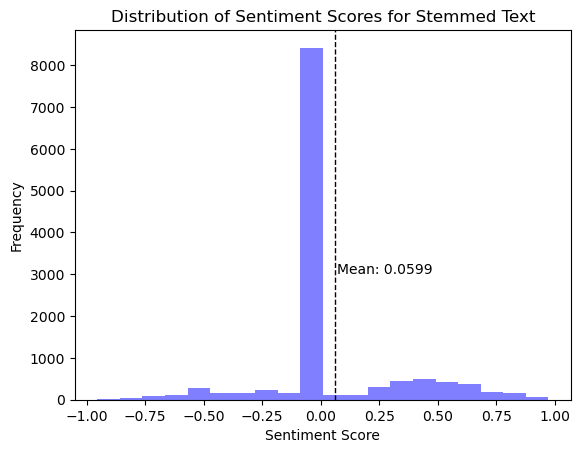

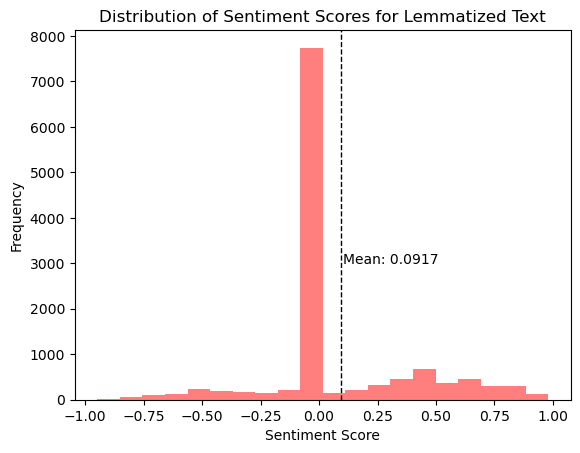

In [12]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores for stemmed text
plt.hist(df['sentiment_score_stemmed_text'], bins=20, color='blue', alpha=0.5)
plt.axvline(df['sentiment_score_stemmed_text'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['sentiment_score_stemmed_text'].mean() + 0.01, 3000, 'Mean: {:.4f}'.format(df['sentiment_score_stemmed_text'].mean()))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Stemmed Text')
plt.show()

# Plot a histogram of sentiment scores for lemmatized text
plt.hist(df['sentiment_score_lemmatized_text'], bins=20, color='red', alpha=0.5)
plt.axvline(df['sentiment_score_lemmatized_text'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['sentiment_score_lemmatized_text'].mean() + 0.01, 3000, 'Mean: {:.4f}'.format(df['sentiment_score_lemmatized_text'].mean()))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Lemmatized Text')
plt.show()

# Visualizing Sentiment Scores with Plotly

Create histograms of sentiment scores for the stemmed and lemmatized text columns using plotly.express.
Add vertical lines and text annotations to indicate the mean sentiment scores.
Update the layout to add titles and axis labels.
Display the plots.

In [13]:
import plotly.express as px
import plotly.graph_objects as go

# Create the histogram for stemmed text
fig1 = px.histogram(df, x="sentiment_score_stemmed_text", nbins=20, opacity=0.5, color_discrete_sequence=['blue'])

# Get the mean sentiment score for stemmed text
mean_stemmed = df['sentiment_score_stemmed_text'].mean()

# Add vertical line for the mean sentiment score of stemmed text
fig1.add_shape(
    type='line',
    x0=mean_stemmed,
    x1=mean_stemmed,
    y0=0,
    y1=9000,
    line=dict(color='black', dash='dash')
)

# Add text annotation for the mean sentiment score of stemmed text
fig1.add_annotation(
    x=mean_stemmed + 0.01,
    y=9000,
    text='Mean: {:.4f}'.format(mean_stemmed),
    showarrow=False,
    font=dict(size=14)
)

# Create the histogram for lemmatized text
fig2 = px.histogram(df, x="sentiment_score_lemmatized_text", nbins=20, opacity=0.5, color_discrete_sequence=['red'])

# Get the mean sentiment score for lemmatized text
mean_lemmatized = df['sentiment_score_lemmatized_text'].mean()

# Add vertical line for the mean sentiment score of lemmatized text
fig2.add_shape(
    type='line',
    x0=mean_lemmatized,
    x1=mean_lemmatized,
    y0=0,
    y1=9000,
    line=dict(color='black', dash='dash')
)

# Add text annotation for the mean sentiment score of lemmatized text
fig2.add_annotation(
    x=mean_lemmatized + 0.01,
    y=9000,
    text='Mean: {:.4f}'.format(mean_lemmatized),
    showarrow=False,
    font=dict(size=14)
)

# Update the layout to add titles and axis labels
fig1.update_layout(
    title='Distribution of Sentiment Scores for Stemmed Text',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency'
)

fig2.update_layout(
    title='Distribution of Sentiment Scores for Lemmatized Text',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency'
)

# Display the plots
fig1.show()
fig2.show()


# Creating Document-Term Matrix

Create a document-term matrix using CountVectorizer with specified parameters.

# Topic Modeling with LDA and NMF

Initialize LDA and NMF models with specified parameters.
Fit the LDA and NMF models to the document-term matrix.
Get the topic-word distributions for both models.
Get the document-topic distributions for both models.
Assign documents to topics based on the highest probability.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Create a function to categorize sentiment scores into "positive", "negative", or "neutral"
def categorize_sentiment(score):
    score = float(score)  # Convert score to float if it's in string format
    if score > 0:
        return "positive sentiment"
    elif score < 0:
        return "negative sentiment"
    else:
        return "neutral sentiment"

# Filter out non-numeric values in sentiment_score_stemmed_text column
numeric_scores = pd.to_numeric(df["sentiment_score_stemmed_text"], errors="coerce")
df["sentiment_score_stemmed_text"] = numeric_scores

# Apply the function to create a new column with sentiment categories
df["sentiment_category_stemmed_text"] = df["sentiment_score_stemmed_text"].apply(categorize_sentiment)


# Convert sentiment_score_lemmatized_text column to the appropriate data type
df["sentiment_score_lemmatized_text"] = df["sentiment_score_lemmatized_text"].astype(float)

# Apply the function to create a new column with sentiment categories
df["sentiment_category_lemmatized_text"] = df["sentiment_score_lemmatized_text"].apply(categorize_sentiment)

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=5000)
dtm = vectorizer.fit_transform(df["text"].apply(lambda x: " ".join(x)))


# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [15]:
# Fit NMF model
nmf_model = NMF(n_components=5, init="nndsvd", random_state=42)
nmf_model.fit(dtm)

NMF(init='nndsvd', n_components=5, random_state=42)

# Identifying Most Representative Documents for Each Topic

Create empty lists to store the most representative documents for each topic.
Iterate over the topics and retrieve the indices of the documents assigned to each topic.
Append the indices to the corresponding lists for NMF and LDA.

In [16]:
# Get the topic-word distributions for LDA
lda_topic_word_distributions = lda_model.components_

# Get the topic-word distributions for NMF
nmf_topic_word_distributions = nmf_model.components_

In [17]:
# Get the document-topic distributions for LDA
lda_document_topic_distributions = lda_model.transform(dtm)

# Get the document-topic distributions for NMF
nmf_document_topic_distributions = nmf_model.transform(dtm)

In [18]:
# Transform the document-term matrix using the fitted NMF model
nmf_topic_documents = nmf_model.transform(dtm).argmax(axis=1)
lda_topic_documents = lda_model.transform(dtm).argmax(axis=1)

most_representative_documents_nmf = []
for topic_id in range(nmf_model.n_components):
    documents = df.iloc[nmf_topic_documents == topic_id].index
    most_representative_documents_nmf.append(documents)


# For LDA
most_representative_documents_lda = []
for topic_id in range(lda_model.n_components):
    documents = df.iloc[lda_topic_documents == topic_id].index
    most_representative_documents_lda.append(documents)


# For NMF
most_representative_documents_nmf = []
for topic_id in range(nmf_model.n_components):
    documents = df.iloc[nmf_topic_documents == topic_id].index
    most_representative_documents_nmf.append(documents)

# Printing Top Terms for Each Topic

Iterate over the topic-word distributions for NMF and LDA.
Get the top 5 terms for each topic based on their importance scores.
Print the top terms for each topic.

In [19]:
# Get the top 5 terms for each topic

for topic_id, topic in enumerate(nmf_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    print("Topic {}: {}".format(topic_id + 1, top_terms))

for topic_id, topic in enumerate(lda_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    print("Topic {}: {}".format(topic_id + 1, top_terms))

Topic 1: ['chatgpt', 'use', 'openai', 'like', 'using']
Topic 2: ['rt', 'gpt4', 'amp', 'prompts', 'https']
Topic 3: ['ai', 'tools', 'gpt4', 'new', 'chatbot']
Topic 4: ['marketcap', 'potential', 'lot', 'hey', 'aipowered']
Topic 5: ['la', 'que', 'en', 'el', 'es']
Topic 1: ['chatgpt', 'rt', 'ai', 'openai', 'marketcap']
Topic 2: ['chatgpt', 'rt', 'que', 'la', 'en']
Topic 3: ['chatgpt', 'rt', 'gpt4', 'ai', 'use']
Topic 4: ['chatgpt', 'ai', 'rt', 'tools', 'gpt']
Topic 5: ['chatgpt', 'rt', 'asked', 'google', 'like']


# Visualizing Top Terms for Each Topic with Matplotlib

Create subplots to display the top terms for NMF and LDA models side by side.
Iterate over the topic-word distributions for NMF and LDA.
Get the top terms for each topic and plot them as horizontal bar charts.

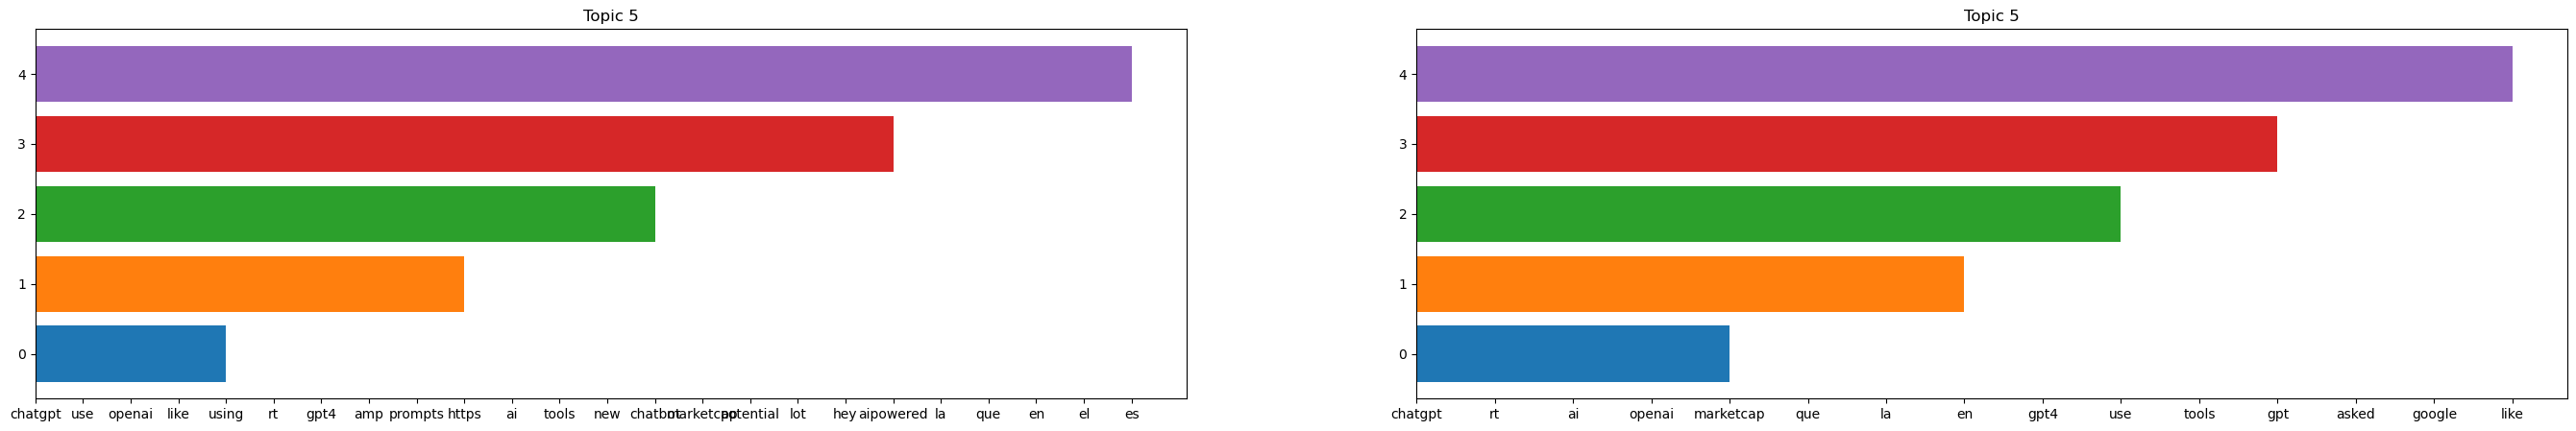

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(34, 5))

for ax, model in zip(axes, [nmf_model, lda_model]):
    for topic_id, topic in enumerate(model.components_):
        top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
        ax.barh(topic_id, top_terms, align='center')
        ax.set_title('Topic {}'.format(topic_id + 1))
    

plt.show()

# Visualizing Top Terms for Each Topic with Plotly

Initialize a figure with subplots for NMF and LDA models.
Iterate over the topic-word distributions for NMF and LDA.
Get the top terms for each topic and add them as bar charts to the figure.
Update the layout of the figure.
Show the plot.

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Initialize figure
fig = make_subplots(rows=1, cols=2, subplot_titles=("NMF Model", "LDA Model"))

# Plot top terms for NMF model
for topic_id, topic in enumerate(nmf_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    fig.add_trace(go.Bar(x=top_terms, y=topic[np.argsort(topic)[:-6:-1]], name=f"Topic {topic_id + 1}"), row=1, col=1)

# Plot top terms for LDA model
for topic_id, topic in enumerate(lda_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    fig.add_trace(go.Bar(x=top_terms, y=topic[np.argsort(topic)[:-6:-1]], name=f"Topic {topic_id + 1}"), row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Top 5 Terms for Each Topic")

# Show the plot
fig.show()

# Counting Tweet Occurrences

Calculate the count of tweets for each unique tweet creation date using the 'tweet_created' column.
Print the tweet counts.

In [22]:
tweet_counts = df['tweet_created'].value_counts()

# Print the tweet counts
print(tweet_counts)

2023-04-06 11:59:44+00:00    6
2023-04-03 05:59:21+00:00    6
2023-04-06 11:59:37+00:00    5
2023-04-20 11:59:45+00:00    5
2023-04-06 12:59:52+00:00    5
                            ..
2023-04-09 12:59:55+00:00    1
2023-04-09 18:58:40+00:00    1
2023-04-09 21:58:40+00:00    1
2023-04-09 00:58:46+00:00    1
2023-04-21 15:59:41+00:00    1
Name: tweet_created, Length: 9721, dtype: int64


# Grouping Tweet Counts by Date

Convert the 'tweet_created' column to datetime format.
Extract the date component from the datetime column using the dt.date attribute.
Group the DataFrame by date and count the number of tweets per day.

In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame with a 'tweet_created' column
df['date'] = pd.to_datetime(df['tweet_created']).dt.date
tweet_counts = df.groupby('date').size()

# Print the tweet counts
print(tweet_counts)

date
2012-12-11       1
2016-08-19       1
2023-04-03     674
2023-04-04     653
2023-04-05     641
2023-04-06    1198
2023-04-07     622
2023-04-08     580
2023-04-09     581
2023-04-10     638
2023-04-11     649
2023-04-12     656
2023-04-13     688
2023-04-14     658
2023-04-15     600
2023-04-16     607
2023-04-17     545
2023-04-18     561
2023-04-19     580
2023-04-20     634
2023-04-21     602
dtype: int64


# Plotting Tweet Counts Over Time with Matplotlib

Filter the DataFrame to include only data from the year 2023.
Group the filtered DataFrame by date and count the number of tweets per day.
Create a line plot using the date as the x-axis and the tweet counts as the y-axis.
Customize the figure with labels and a title.

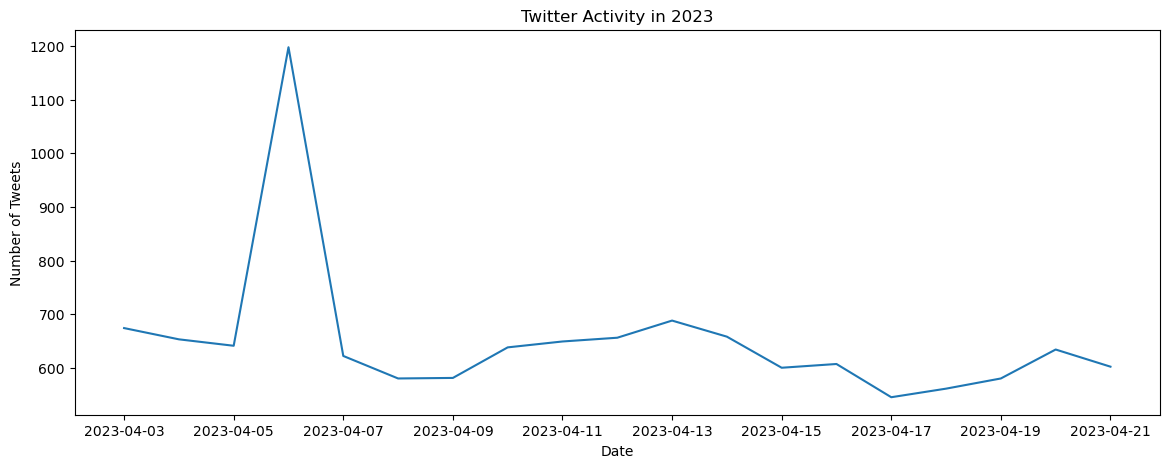

In [24]:
import matplotlib.pyplot as plt



# Assuming your dataframe is called 'df'
df['date'] = pd.to_datetime(df['date'])

df_2023 = df[df['date'].dt.year == 2023]

# Group by date and count the number of tweets per day
tweet_counts = df_2023.groupby('date').size()


# Group by date and count the number of tweets per day
tweet_counts = df_2023.groupby('date').size()

# Create a line plot of the tweet counts
plt.figure(figsize=(14,5)) # set the figure size to 10 inches by 5 inches
plt.plot(tweet_counts.index, tweet_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Twitter Activity in 2023')
plt.show()

# Plotting Tweet Counts Over Time with Plotly

Filter the DataFrame to include only data from the year 2023.
Group the filtered DataFrame by date and count the number of tweets per day.
Create an interactive line plot using Plotly, specifying the x-axis as the date and the y-axis as the tweet counts.
Customize the plot with titles for the axes and a main title.

In [25]:
import plotly.express as px

# Assuming your dataframe is called 'df'
df_2023 = df[df['date'].dt.year == 2023]

# Group by date and count the number of tweets per day
tweet_counts = df_2023.groupby('date').size().reset_index(name='count')

# Create an interactive line plot of the tweet counts
fig = px.line(tweet_counts, x='date', y='count', title='Twitter Activity in 2023')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Number of Tweets')
fig.show()

# Cleaning User Descriptions
Convert the 'user_description' column to string type.
Remove unwanted characters from the 'user_description' column using regular expressions.
Print the cleaned 'user_description' column.

In [26]:
import pandas as pd
import re

# Convert content column to string type
df['user_description'] = df['user_description'].astype(str)

# Remove unwanted characters from content column
df['user_description'] = df['user_description'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

# Show cleaned content column
print(df['user_description'])

0                                    JacksonWang852       
1          4  TypeScriptVueReact ChatGPT plus  DrvoProject
2                                                         
3        Passionate about AI and its potential to trans...
4        Freedom is the Recognition of Necessity  Marke...
                               ...                        
21996                                                     
21997                                                  nan
21998    Geek rfrencement naturel SEO SMOSEM Pour me jo...
21999    Theology  Science and Religion  Psychology  Gu...
22001    We mostly make cool and funny videos withabout...
Name: user_description, Length: 12369, dtype: object


# Lowercasing User Descriptions
Convert the 'user_description' column to lowercase.
Print the lowercase 'user_description' column.


In [27]:
import pandas as pd

# Convert text column to lowercase
df['user_description'] = df['user_description'].str.lower()

# Show lowercase text column
print(df['user_description'])

0                                    jacksonwang852       
1          4  typescriptvuereact chatgpt plus  drvoproject
2                                                         
3        passionate about ai and its potential to trans...
4        freedom is the recognition of necessity  marke...
                               ...                        
21996                                                     
21997                                                  nan
21998    geek rfrencement naturel seo smosem pour me jo...
21999    theology  science and religion  psychology  gu...
22001    we mostly make cool and funny videos withabout...
Name: user_description, Length: 12369, dtype: object


# Removing Stop Words from User Descriptions
Import the necessary libraries (pandas, nltk, stopwords).
Define the set of stop words using the English stopwords corpus.
Remove stop words from the 'user_description' column using list comprehension.
Print the 'user_description' column without stop words.

In [28]:
import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words to remove
stop_words = set(stopwords.words('english'))

# Remove stop words from text column
df['user_description'] = df['user_description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Show text column without stop words
print(df['user_description'])

0                                           jacksonwang852
1            4 typescriptvuereact chatgpt plus drvoproject
2                                                         
3        passionate ai potential transform business lan...
4        freedom recognition necessity market socialism...
                               ...                        
21996                                                     
21997                                                  nan
21998    geek rfrencement naturel seo smosem pour joind...
21999    theology science religion psychology guitars b...
22001    mostly make cool funny videos withabout cars e...
Name: user_description, Length: 12369, dtype: object


# Tokenizing User Descriptions
Import the necessary libraries (nltk, word_tokenize).
Tokenize the 'user_description' column using the word_tokenize function.
Print the tokenized 'user_description' column.


In [29]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize text column
df['user_description'] = df['user_description'].apply(lambda x: word_tokenize(x))

# Show tokenized text column
print(df['user_description'])

0                                         [jacksonwang852]
1        [4, typescriptvuereact, chatgpt, plus, drvopro...
2                                                       []
3        [passionate, ai, potential, transform, busines...
4        [freedom, recognition, necessity, market, soci...
                               ...                        
21996                                                   []
21997                                                [nan]
21998    [geek, rfrencement, naturel, seo, smosem, pour...
21999    [theology, science, religion, psychology, guit...
22001    [mostly, make, cool, funny, videos, withabout,...
Name: user_description, Length: 12369, dtype: object


# Stemming and Lemmatizing User Descriptions
Import the necessary libraries (nltk, word_tokenize, PorterStemmer, WordNetLemmatizer).
Create instances of the PorterStemmer and WordNetLemmatizer.
Apply stemming and lemmatization to the tokenized 'user_description' column using list comprehension and join the words back into a string.
Create new columns 'stemmed_text_description' and 'lemmatized_text_description' in the DataFrame.
Show the first few rows of the DataFrame with the new columns.

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Create stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stem each word in the tokenized text and join them back into a string
df['stemmed_text_description'] = df['user_description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

# Lemmatize each word in the tokenized text and join them back into a string
df['lemmatized_text_description'] = df['user_description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

# Show the first few rows of the dataframe with the new columns
df.head()

tweet_id              tweet_created  \
0   1.642889622681432e+18  2023-04-03 13:59:44+00:00   
1  1.6428442314496123e+18  2023-04-03 10:59:22+00:00   
2  1.6427385624866693e+18  2023-04-03 03:59:28+00:00   
3  1.6429198880616448e+18  2023-04-03 15:59:59+00:00   
4   1.642708351690711e+18  2023-04-03 01:59:25+00:00   

              tweet_extracted  \
0  2023-04-08 01:07:02.538242   
1  2023-04-08 01:06:59.379927   
2  2023-04-08 01:06:52.504868   
3  2023-04-08 01:07:04.742617   
4  2023-04-08 01:06:50.638068   

                                                text lang  \
0                               [rt, jexep, chatgpt]   th   
1               [chatgptchrome4, httpstcohfacfe570t]   ja   
2  [rt, darrelllerner, chatgpt, plugins, fastest,...   en   
3  [get, intelligent, chatbot, website, minutes, ...   en   
4  [hey, guys, zenithswap, launched, 55000, usd, ...   en   

               user_id           user_name    user_username    user_location  \
0           4706577259          👷🏼 ♡ #GOT7      BPawarisa1a  ในใจJacksonwang   
1           2264288640             ミミズクりんゆ     DRVO_Project            東京←岐阜   
2           2383245894                  pk  pradeep42329225            India   
3  1633040597782081537            AR Leyva     ArrheniusLey   United Kingdom   
4  1311403370670960640  Human Being 🇨🇳🇸🇬🇻🇳  KiarostamiBeing      Chicago, IL   

                                    user_description  ... impression_count  \
0                                   [jacksonwang852]  ...              0.0   
1  [4, typescriptvuereact, chatgpt, plus, drvopro...  ...            290.0   
2                                                 []  ...              0.0   
3  [passionate, ai, potential, transform, busines...  ...             58.0   
4  [freedom, recognition, necessity, market, soci...  ...              0.0   

                                        stemmed_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllern chatgpt plugin fastest way get ...   
3  get intellig chatbot websit minut chatbas ai t...   
4  hey guy zenithswap launch 55000 usd marketcap ...   

                                     lemmatized_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllerner chatgpt plugins fastest way g...   
3  get intelligent chatbot website minute chatbas...   
4  hey guy zenithswap launched 55000 usd marketca...   

   sentiment_score_stemmed_text sentiment_score_lemmatized_text  \
0                        0.0000                          0.0000   
1                        0.0000                          0.0000   
2                        0.5574                          0.6808   
3                        0.0000                          0.7096   
4                       -0.2732                         -0.1531   

   sentiment_category_stemmed_text  sentiment_category_lemmatized_text  \
0                neutral sentiment                   neutral sentiment   
1                neutral sentiment                   neutral sentiment   
2               positive sentiment                  positive sentiment   
3                neutral sentiment                  positive sentiment   
4               negative sentiment                  negative sentiment   

        date                           stemmed_text_description  \
0 2023-04-03                                     jacksonwang852   
1 2023-04-03       4 typescriptvuereact chatgpt plu drvoproject   
2 2023-04-03                                                      
3 2023-04-03  passion ai potenti transform busi landscap sha...   
4 2023-04-03  freedom recognit necess market social cheng en...   

                         lemmatized_text_description  
0                                     jacksonwang852  
1      4 typescriptvuereact chatgpt plus drvoproject  
2                                                     
3  passionate ai po

# Sentiment Analysis on User Descriptions
Import the necessary libraries (nltk, SentimentIntensityAnalyzer).
Instantiate the SentimentIntensityAnalyzer.
Define a function to calculate the sentiment score for each user description.
Apply the function to the 'stemmed_text_description' and 'lemmatized_text_description' columns to get the sentiment scores.
Show the DataFrame with the sentiment score columns.

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader lexicon if not already present
# nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score for each tweet
def get_sentiment_score(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    return sentiment['compound']

# Apply the function to the tokenized text column to get the sentiment score for each tweet
df['sentiment_score_stemmed_text_description'] = df['stemmed_text_description'].apply(lambda x: get_sentiment_score(x))
df['sentiment_score_lemmatized_text_description'] = df['lemmatized_text_description'].apply(lambda x: get_sentiment_score(x))

# Show the dataframe with the sentiment score column
df.head()

tweet_id              tweet_created  \
0   1.642889622681432e+18  2023-04-03 13:59:44+00:00   
1  1.6428442314496123e+18  2023-04-03 10:59:22+00:00   
2  1.6427385624866693e+18  2023-04-03 03:59:28+00:00   
3  1.6429198880616448e+18  2023-04-03 15:59:59+00:00   
4   1.642708351690711e+18  2023-04-03 01:59:25+00:00   

              tweet_extracted  \
0  2023-04-08 01:07:02.538242   
1  2023-04-08 01:06:59.379927   
2  2023-04-08 01:06:52.504868   
3  2023-04-08 01:07:04.742617   
4  2023-04-08 01:06:50.638068   

                                                text lang  \
0                               [rt, jexep, chatgpt]   th   
1               [chatgptchrome4, httpstcohfacfe570t]   ja   
2  [rt, darrelllerner, chatgpt, plugins, fastest,...   en   
3  [get, intelligent, chatbot, website, minutes, ...   en   
4  [hey, guys, zenithswap, launched, 55000, usd, ...   en   

               user_id           user_name    user_username    user_location  \
0           4706577259          👷🏼 ♡ #GOT7      BPawarisa1a  ในใจJacksonwang   
1           2264288640             ミミズクりんゆ     DRVO_Project            東京←岐阜   
2           2383245894                  pk  pradeep42329225            India   
3  1633040597782081537            AR Leyva     ArrheniusLey   United Kingdom   
4  1311403370670960640  Human Being 🇨🇳🇸🇬🇻🇳  KiarostamiBeing      Chicago, IL   

                                    user_description  ...  \
0                                   [jacksonwang852]  ...   
1  [4, typescriptvuereact, chatgpt, plus, drvopro...  ...   
2                                                 []  ...   
3  [passionate, ai, potential, transform, busines...  ...   
4  [freedom, recognition, necessity, market, soci...  ...   

                                     lemmatized_text  \
0                                   rt jexep chatgpt   
1                  chatgptchrome4 httpstcohfacfe570t   
2  rt darrelllerner chatgpt plugins fastest way g...   
3  get intelligent chatbot website minute chatbas...   
4  hey guy zenithswap launched 55000 usd marketca...   

   sentiment_score_stemmed_text  sentiment_score_lemmatized_text  \
0                        0.0000                           0.0000   
1                        0.0000                           0.0000   
2                        0.5574                           0.6808   
3                        0.0000                           0.7096   
4                       -0.2732                          -0.1531   

   sentiment_category_stemmed_text sentiment_category_lemmatized_text  \
0                neutral sentiment                  neutral sentiment   
1                neutral sentiment                  neutral sentiment   
2               positive sentiment                 positive sentiment   
3                neutral sentiment                 positive sentiment   
4               negative sentiment                 negative sentiment   

        date                           stemmed_text_description  \
0 2023-04-03                                     jacksonwang852   
1 2023-04-03       4 typescriptvuereact chatgpt plu drvoproject   
2 2023-04-03                                                      
3 2023-04-03  passion ai potenti transform busi landscap sha...   
4 2023-04-03  freedom recognit necess market social cheng en...   

                         lemmatized_text_description  \
0                                     jacksonwang852   
1      4 typescriptvuereact chatgpt plus drvoproject   
2                                                      
3  passionate ai potential transform business lan...   
4  freedom recognition necessity market socialism...   

   sentiment_score_stemmed_text_description  \
0                                    0.0000   
1                                    0.0000   
2                                    0.0000   
3                                    0.4588   
4                                    0.6369   

   sentiment_score_lemmatized_text_description  
0        

# Calculating Mean Sentiment Scores
Calculate the mean sentiment scores for the stemmed and lemmatized text.
Print the mean sentiment scores.

In [32]:
stemmed_sentiment_mean = df['sentiment_score_stemmed_text_description'].mean()
lemmatized_sentiment_mean = df['sentiment_score_lemmatized_text_description'].mean()

print('Mean sentiment score for stemmed text:', stemmed_sentiment_mean)
print('Mean sentiment score for lemmatized text:', lemmatized_sentiment_mean)

Mean sentiment score for stemmed text: 0.058071121351766515
Mean sentiment score for lemmatized text: 0.08028446115288221


# Plotting Histograms of Sentiment Scores with Matplotlib
Import the necessary libraries (matplotlib.pyplot).
Plot a histogram of sentiment scores for the stemmed text.
Add a vertical line and text annotation for the mean sentiment score of the stemmed text.
Customize the plot with labels and a title.

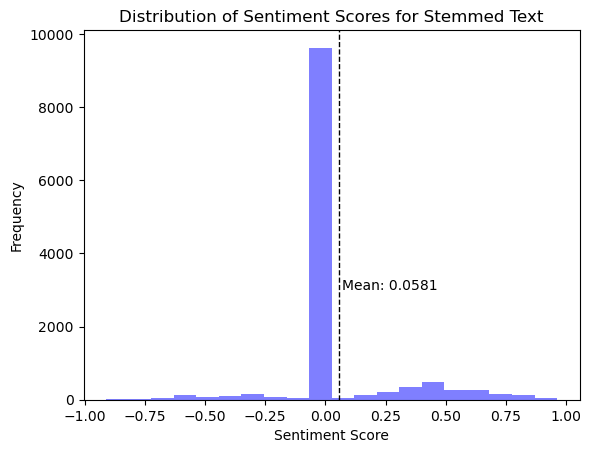

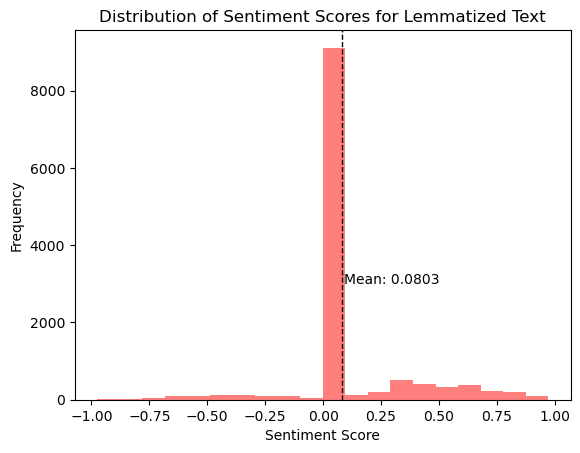

In [33]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores for stemmed text
plt.hist(df['sentiment_score_stemmed_text_description'], bins=20, color='blue', alpha=0.5)
plt.axvline(df['sentiment_score_stemmed_text_description'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['sentiment_score_stemmed_text_description'].mean() + 0.01, 3000, 'Mean: {:.4f}'.format(df['sentiment_score_stemmed_text_description'].mean()))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Stemmed Text')
plt.show()

# Plot a histogram of sentiment scores for lemmatized text
plt.hist(df['sentiment_score_lemmatized_text_description'], bins=20, color='red', alpha=0.5)
plt.axvline(df['sentiment_score_lemmatized_text_description'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['sentiment_score_lemmatized_text_description'].mean() + 0.01, 3000, 'Mean: {:.4f}'.format(df['sentiment_score_lemmatized_text_description'].mean()))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Lemmatized Text')
plt.show()

# Plotting Histograms of Sentiment Scores with Plotly
Import the necessary libraries (plotly.express, plotly.graph_objects).
Create histograms of sentiment scores for the stemmed and lemmatized text using Plotly.
Add vertical lines and text annotations for the mean sentiment scores of the stemmed and lemmatized text.
Customize the plots with titles and axis labels.

In [34]:
import plotly.express as px
import plotly.graph_objects as go

# Create the histogram for stemmed text
fig1 = px.histogram(df, x="sentiment_score_stemmed_text_description", nbins=20, opacity=0.5, color_discrete_sequence=['blue'])

# Get the mean sentiment score for stemmed text
mean_stemmed = df['sentiment_score_stemmed_text_description'].mean()

# Add vertical line for the mean sentiment score of stemmed text
fig1.add_shape(
    type='line',
    x0=mean_stemmed,
    x1=mean_stemmed,
    y0=0,
    y1=9000,
    line=dict(color='black', dash='dash')
)

# Add text annotation for the mean sentiment score of stemmed text
fig1.add_annotation(
    x=mean_stemmed + 0.01,
    y=9000,
    text='Mean: {:.4f}'.format(mean_stemmed),
    showarrow=False,
    font=dict(size=14)
)

# Create the histogram for lemmatized text
fig2 = px.histogram(df, x="sentiment_score_lemmatized_text_description", nbins=20, opacity=0.5, color_discrete_sequence=['red'])

# Get the mean sentiment score for lemmatized text
mean_lemmatized = df['sentiment_score_lemmatized_text_description'].mean()

# Add vertical line for the mean sentiment score of lemmatized text
fig2.add_shape(
    type='line',
    x0=mean_lemmatized,
    x1=mean_lemmatized,
    y0=0,
    y1=9000,
    line=dict(color='black', dash='dash')
)

# Add text annotation for the mean sentiment score of lemmatized text
fig2.add_annotation(
    x=mean_lemmatized + 0.01,
    y=9000,
    text='Mean: {:.4f}'.format(mean_lemmatized),
    showarrow=False,
    font=dict(size=14)
)

# Update the layout to add titles and axis labels
fig1.update_layout(
    title='Distribution of Sentiment Scores for Stemmed Text',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency'
)

fig2.update_layout(
    title='Distribution of Sentiment Scores for Lemmatized Text',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency'
)

# Display the plots
fig1.show()
fig2.show()


# Creating Document-Term Matrix

Create a document-term matrix using CountVectorizer with specified parameters.

# Topic Modeling with LDA and NMF

Initialize LDA and NMF models with specified parameters.
Fit the LDA and NMF models to the document-term matrix.
Get the topic-word distributions for both models.
Get the document-topic distributions for both models.
Assign documents to topics based on the highest probability.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Create a function to categorize sentiment scores into "positive", "negative", or "neutral"
def categorize_sentiment(score):
    score = float(score)  # Convert score to float if it's in string format
    if score > 0:
        return "positive sentiment"
    elif score < 0:
        return "negative sentiment"
    else:
        return "neutral sentiment"

# Filter out non-numeric values in sentiment_score_stemmed_text column
numeric_scores = pd.to_numeric(df["sentiment_score_stemmed_text"], errors="coerce")
df["sentiment_score_stemmed_text_description"] = numeric_scores

# Apply the function to create a new column with sentiment categories
df["sentiment_category_stemmed_text_description"] = df["sentiment_score_stemmed_text_description"].apply(categorize_sentiment)


# Convert sentiment_score_lemmatized_text column to the appropriate data type
df["sentiment_score_lemmatized_text_description"] = df["sentiment_score_lemmatized_text_description"].astype(float)

# Apply the function to create a new column with sentiment categories
df["sentiment_category_lemmatized_text_description"] = df["sentiment_score_lemmatized_text_description"].apply(categorize_sentiment)

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=5000)
dtm = vectorizer.fit_transform(df["user_description"].apply(lambda x: " ".join(x)))


# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [36]:
# Fit NMF model
nmf_model = NMF(n_components=5, init="nndsvd", random_state=42)
nmf_model.fit(dtm)

NMF(init='nndsvd', n_components=5, random_state=42)

In [37]:
# Get the topic-word distributions for LDA
lda_topic_word_distributions = lda_model.components_

# Get the topic-word distributions for NMF
nmf_topic_word_distributions = nmf_model.components_

In [38]:
# Get the document-topic distributions for LDA
lda_document_topic_distributions = lda_model.transform(dtm)

# Get the document-topic distributions for NMF
nmf_document_topic_distributions = nmf_model.transform(dtm)

# Identifying Most Representative Documents for Each Topic

Create empty lists to store the most representative documents for each topic.
Iterate over the topics and retrieve the indices of the documents assigned to each topic.
Append the indices to the corresponding lists for NMF and LDA.

In [39]:
# Transform the document-term matrix using the fitted NMF model
nmf_topic_documents = nmf_model.transform(dtm).argmax(axis=1)
lda_topic_documents = lda_model.transform(dtm).argmax(axis=1)

most_representative_documents_nmf = []
for topic_id in range(nmf_model.n_components):
    documents = df.iloc[nmf_topic_documents == topic_id].index
    most_representative_documents_nmf.append(documents)


# For LDA
most_representative_documents_lda = []
for topic_id in range(lda_model.n_components):
    documents = df.iloc[lda_topic_documents == topic_id].index
    most_representative_documents_lda.append(documents)


# For NMF
most_representative_documents_nmf = []
for topic_id in range(nmf_model.n_components):
    documents = df.iloc[nmf_topic_documents == topic_id].index
    most_representative_documents_nmf.append(documents)

# Printing Top Terms for Each Topic

Iterate over the topic-word distributions for NMF and LDA.
Get the top 5 terms for each topic based on their importance scores.
Print the top terms for each topic.

In [40]:
# Get the top 5 terms for each topic

for topic_id, topic in enumerate(nmf_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    print("Topic {}: {}".format(topic_id + 1, top_terms))

for topic_id, topic in enumerate(lda_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    print("Topic {}: {}".format(topic_id + 1, top_terms))

Topic 1: ['nan', 'zu', 'filmmaker', 'filosofa', 'final']
Topic 2: ['ai', 'chatgpt', 'powered', 'tech', 'data']
Topic 3: ['la', 'que', 'et', 'el', 'por']
Topic 4: ['news', 'latest', 'intelligence', 'artificial', 'uptodate']
Topic 5: ['en', 'el', 'que', 'del', 'los']
Topic 1: ['ai', 'chatgpt', 'marketing', 'tech', 'business']
Topic 2: ['nan', 'developer', 'software', 'rt', 'new']
Topic 3: ['la', 'en', 'que', 'el', 'para']
Topic 4: ['ai', 'news', 'crypto', 'data', 'technology']
Topic 5: ['im', 'account', 'twitter', 'life', 'dm']


# Visualizing Top Terms for Each Topic with Matplotlib

Create subplots to display the top terms for NMF and LDA models side by side.
Iterate over the topic-word distributions for NMF and LDA.
Get the top terms for each topic and plot them as horizontal bar charts.

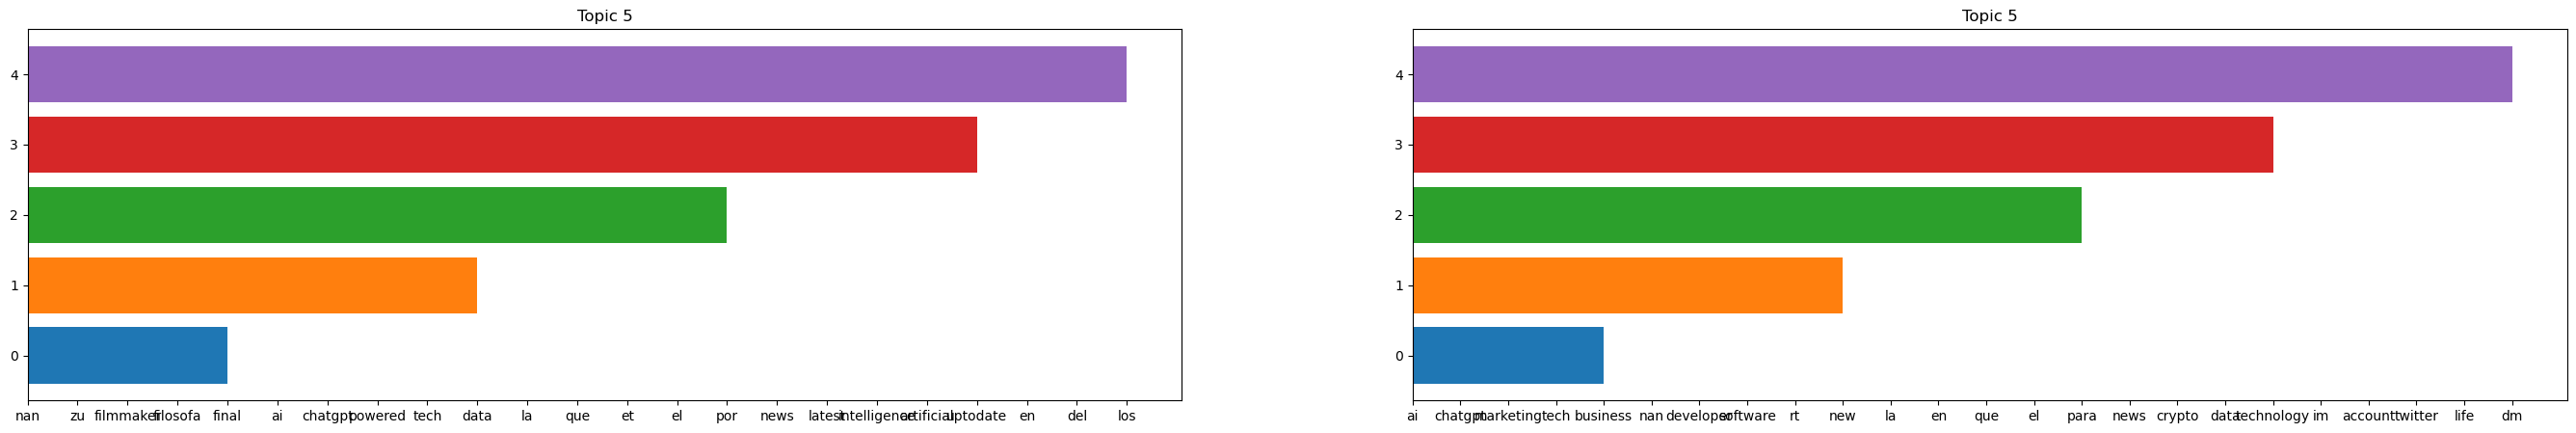

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(34, 5))

for ax, model in zip(axes, [nmf_model, lda_model]):
    for topic_id, topic in enumerate(model.components_):
        top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
        ax.barh(topic_id, top_terms, align='center')
        ax.set_title('Topic {}'.format(topic_id + 1))
    

plt.show()

# Visualizing Top Terms for Each Topic with Plotly

Initialize a figure with subplots for NMF and LDA models.
Iterate over the topic-word distributions for NMF and LDA.
Get the top terms for each topic and add them as bar charts to the figure.
Update the layout of the figure.
Show the plot.

In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Initialize figure
fig = make_subplots(rows=1, cols=2, subplot_titles=("NMF Model", "LDA Model"))

# Plot top terms for NMF model
for topic_id, topic in enumerate(nmf_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    fig.add_trace(go.Bar(x=top_terms, y=topic[np.argsort(topic)[:-6:-1]], name=f"Topic {topic_id + 1}"), row=1, col=1)

# Plot top terms for LDA model
for topic_id, topic in enumerate(lda_model.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]  # Get top 5 terms
    fig.add_trace(go.Bar(x=top_terms, y=topic[np.argsort(topic)[:-6:-1]], name=f"Topic {topic_id + 1}"), row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Top 5 Terms for Each Topic")

# Show the plot
fig.show()

# Plotting Words for Each Topic with Matplotlib

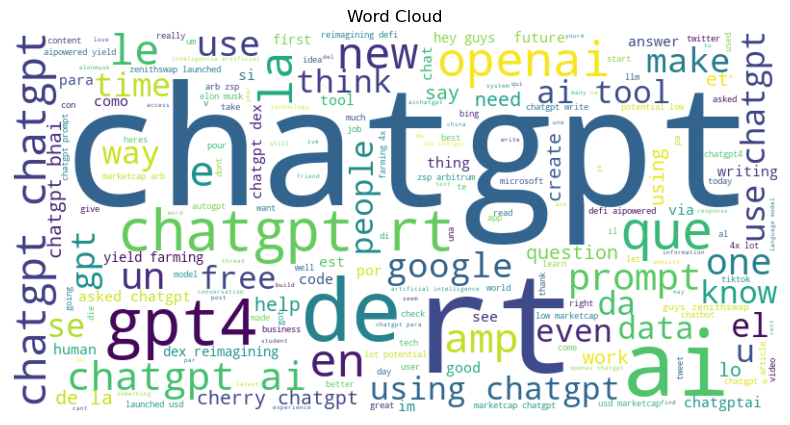

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data into a single string
text = ' '.join([' '.join(words) for words in df['text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

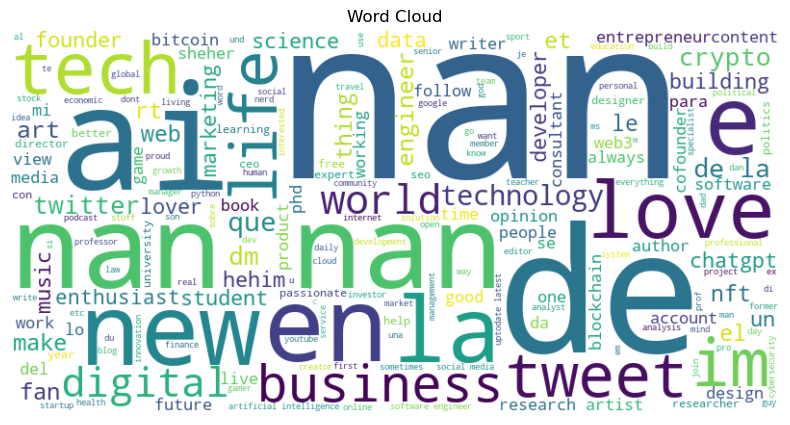

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data into a single string
text = ' '.join([' '.join(words) for words in df['user_description']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Create a dictionary from the tokenized text data
Replace most_representative_documents_lda with the appropriate variable.
Tokenize the documents for each topic.
Calculate the coherence score using the c_v coherence measure.

In [45]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import nltk
from nltk.tokenize import word_tokenize

def tokenize(text):
    text = str(text)  # Convert input to a string
    tokens = word_tokenize(text)
    return tokens


# Create a dictionary from the tokenized text data
dictionary = Dictionary(df['text'])

# Replace most_representative_documents_lda with the appropriate variable
documents_per_topic_lda = most_representative_documents_lda

# Tokenize the documents for each topic
tokenized_documents = [tokenize(document) for document in documents_per_topic_lda]

# Calculate the coherence score using the c_v coherence measure
coherence_model_lda = CoherenceModel(
    topics=tokenized_documents,
    texts=df['text'],
    dictionary=dictionary,
    coherence='c_v'
)

coherence_lda = coherence_model_lda.get_coherence()

# Print the coherence score
print("LDA Topic Coherence Score: {:.4f}".format(coherence_lda))


LDA Topic Coherence Score: 0.4112


In [46]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Create a dictionary from the tokenized text data
dictionary = Dictionary(df['text'])

# Replace most_representative_documents_nmf with the appropriate variable
documents_per_topic_nmf = most_representative_documents_nmf

# Tokenize the documents for each topic
tokenized_documents = [document for document in documents_per_topic_nmf]

# Calculate the coherence score using the c_v coherence measure
coherence_model_nmf = CoherenceModel(
    topics=tokenized_documents,
    texts=df['text'],
    dictionary=dictionary,
    coherence='c_v'
)

coherence_nmf = coherence_model_nmf.get_coherence()

# Print the coherence score
print("NMF Topic Coherence Score: {:.4f}".format(coherence_nmf))


NMF Topic Coherence Score: 0.6065


In [47]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Create a dictionary from the tokenized text data
dictionary = Dictionary(df['user_description'])

# Replace most_representative_documents_lda with the appropriate variable
documents_per_topic_lda = most_representative_documents_lda

# Tokenize the documents for each topic
tokenized_documents = [dictionary for document in documents_per_topic_lda]

# Calculate the coherence score using the c_v coherence measure
coherence_model_lda = CoherenceModel(
    topics=tokenized_documents,
    texts=df['user_description'],
    dictionary=dictionary,
    coherence='c_v'
)

coherence_lda = coherence_model_lda.get_coherence()

# Print the coherence score
print("LDA Topic Coherence Score: {:.4f}".format(coherence_lda))


LDA Topic Coherence Score: 0.2504


In [48]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Create a dictionary from the tokenized text data
dictionary = Dictionary(df['user_description'])

# Replace most_representative_documents_nmf with the appropriate variable
documents_per_topic_nmf = most_representative_documents_nmf

# Tokenize the documents for each topic
tokenized_documents = [document for document in documents_per_topic_nmf]

# Calculate the coherence score using the c_v coherence measure
coherence_model_nmf = CoherenceModel(
    topics=tokenized_documents,
    texts=df['user_description'],
    dictionary=dictionary,
    coherence='c_v'
)

coherence_nmf = coherence_model_nmf.get_coherence()

# Print the coherence score
print("NMF Topic Coherence Score: {:.4f}".format(coherence_nmf))


NMF Topic Coherence Score: 0.5673


# K-means clustering on the topic representations

In [49]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the lists of texts into a single string
text = [' '.join(doc) for doc in df['text']]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Create an LDA model with 5 topics
lda_model = LatentDirichletAllocation(n_components=5)
topic_representations = lda_model.fit_transform(X)

# Perform K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(topic_representations)

# Assign cluster labels to the dataframe
df['cluster'] = clusters

# Print the cluster assignments
print(df[['text', 'cluster']])

C:\Users\sehja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                    text  cluster
0                                   [rt, jexep, chatgpt]        1
1                   [chatgptchrome4, httpstcohfacfe570t]        4
2      [rt, darrelllerner, chatgpt, plugins, fastest,...        4
3      [get, intelligent, chatbot, website, minutes, ...        1
4      [hey, guys, zenithswap, launched, 55000, usd, ...        0
...                                                  ...      ...
21996  [rt, juanvirguezzz, hoy, descubr, chatgpt, lit...        3
21997  [rt, jaimeribafer, detrs, del, chatgpt, httpst...        0
21998  [rt, sudosuberenu, os, presento, una, de, las,...        2
21999  [rt, pmphillips, dangerous, misuse, facts, fic...        0
22001  [chatgpt, wrote, entire, script, video, 2023, ...        1

[12369 rows x 2 columns]


# Plotting number of tweets in each cluster for each day with Matplotlib

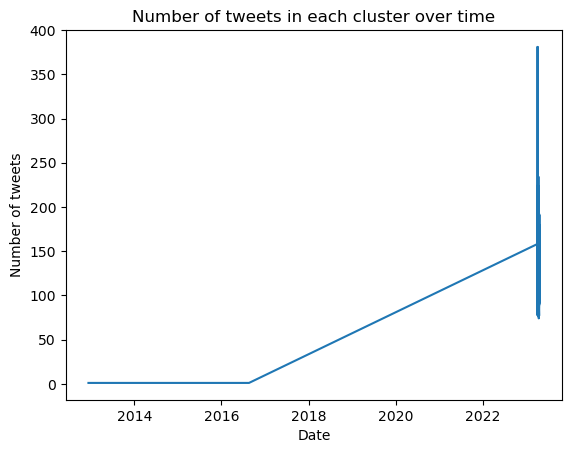

In [50]:
import matplotlib.pyplot as plt

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Plot the number of tweets in each cluster for each day
plt.plot(df_grouped['date'], df_grouped['num_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Number of tweets in each cluster over time')
plt.show()


# Plotting number of tweets in each cluster for each day with Matplotlib and squarify

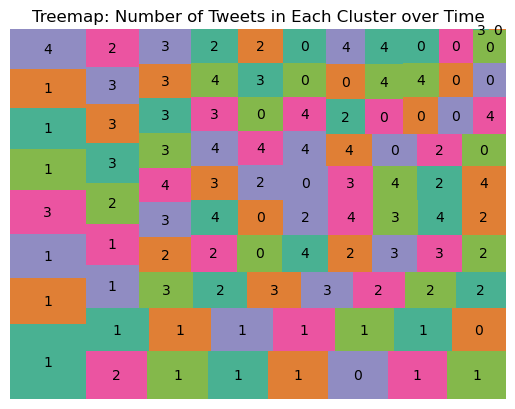

In [51]:
# !pip install squarify
import matplotlib.pyplot as plt
import squarify

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Sort the data by the number of tweets in descending order
df_grouped = df_grouped.sort_values('num_tweets', ascending=False)

# Assign colors to clusters
colors = plt.cm.Dark2(range(len(df_grouped['cluster'].unique())))

# Plot the treemap
squarify.plot(sizes=df_grouped['num_tweets'], label=df_grouped['cluster'], color=colors, alpha=0.8)

# Set plot title
plt.title('Treemap: Number of Tweets in Each Cluster over Time')

# Remove axis labels
plt.axis('off')

# Display the plot
plt.show()

# Plotting interactive line plot

In [52]:
import plotly.graph_objects as go

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Create an interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_grouped['date'], y=df_grouped['num_tweets'], mode='lines'))

fig.update_layout(
    title='Number of tweets in each cluster over time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of tweets')
)

fig.show()

In [53]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Convert the lists of texts into a single string
text = [' '.join(doc) for doc in df['text']]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Create an NMF model with 5 topics
nmf_model = NMF(n_components=5)
topic_representations = nmf_model.fit_transform(X)

# Perform K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(topic_representations)

# Assign cluster labels to the dataframe
df['cluster'] = clusters

# Print the cluster assignments
print(df[['text', 'cluster']])

C:\Users\sehja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                    text  cluster
0                                   [rt, jexep, chatgpt]        0
1                   [chatgptchrome4, httpstcohfacfe570t]        4
2      [rt, darrelllerner, chatgpt, plugins, fastest,...        0
3      [get, intelligent, chatbot, website, minutes, ...        3
4      [hey, guys, zenithswap, launched, 55000, usd, ...        1
...                                                  ...      ...
21996  [rt, juanvirguezzz, hoy, descubr, chatgpt, lit...        2
21997  [rt, jaimeribafer, detrs, del, chatgpt, httpst...        0
21998  [rt, sudosuberenu, os, presento, una, de, las,...        2
21999  [rt, pmphillips, dangerous, misuse, facts, fic...        0
22001  [chatgpt, wrote, entire, script, video, 2023, ...        4

[12369 rows x 2 columns]


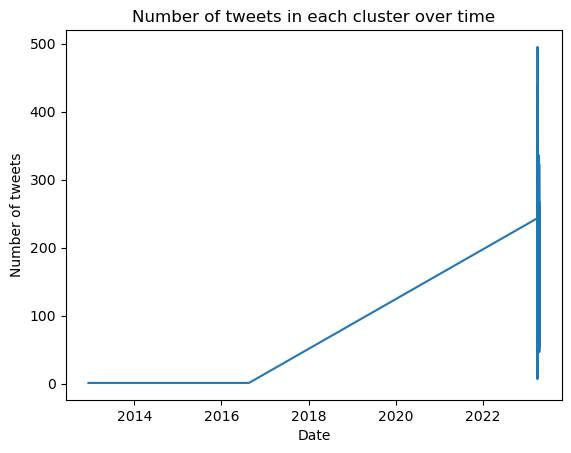

In [54]:
import matplotlib.pyplot as plt

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Plot the number of tweets in each cluster for each day
plt.plot(df_grouped['date'], df_grouped['num_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Number of tweets in each cluster over time')
plt.show()


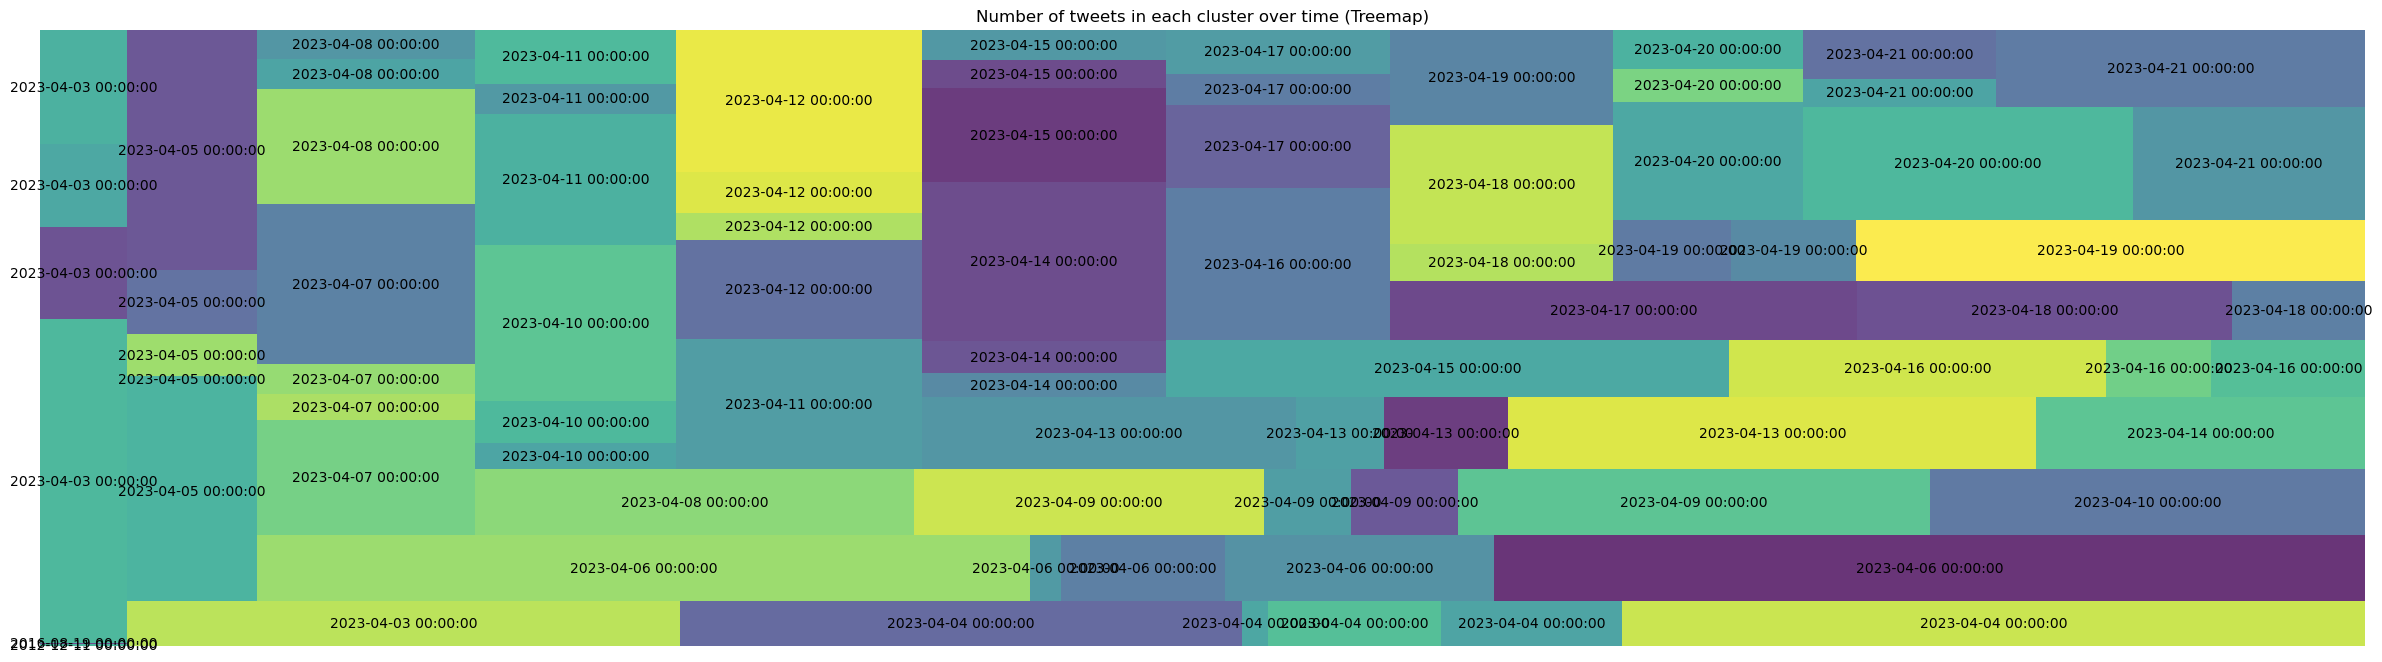

In [55]:
import matplotlib.pyplot as plt
import squarify

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Create a treemap using squarify
plt.figure(figsize=(30, 8))
squarify.plot(sizes=df_grouped['num_tweets'], label=df_grouped['date'], alpha=0.8)

# Add labels and title
plt.axis('off')
plt.title('Number of tweets in each cluster over time (Treemap)')

# Display the treemap
plt.show()

In [56]:
import plotly.graph_objects as go

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Create an interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_grouped['date'], y=df_grouped['num_tweets'], mode='lines'))

fig.update_layout(
    title='Number of tweets in each cluster over time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of tweets')
)

fig.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the lists of texts into a single string
text = [' '.join(doc) for doc in df['user_description']]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Create an LDA model with 5 topics
lda_model = LatentDirichletAllocation(n_components=5)
topic_representations = lda_model.fit_transform(X)

# Perform K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(topic_representations)

# Assign cluster labels to the dataframe
df['cluster'] = clusters

# Print the cluster assignments
print(df[['text', 'cluster']])

C:\Users\sehja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                    text  cluster
0                                   [rt, jexep, chatgpt]        0
1                   [chatgptchrome4, httpstcohfacfe570t]        3
2      [rt, darrelllerner, chatgpt, plugins, fastest,...        0
3      [get, intelligent, chatbot, website, minutes, ...        2
4      [hey, guys, zenithswap, launched, 55000, usd, ...        4
...                                                  ...      ...
21996  [rt, juanvirguezzz, hoy, descubr, chatgpt, lit...        0
21997  [rt, jaimeribafer, detrs, del, chatgpt, httpst...        0
21998  [rt, sudosuberenu, os, presento, una, de, las,...        2
21999  [rt, pmphillips, dangerous, misuse, facts, fic...        3
22001  [chatgpt, wrote, entire, script, video, 2023, ...        1

[12369 rows x 2 columns]


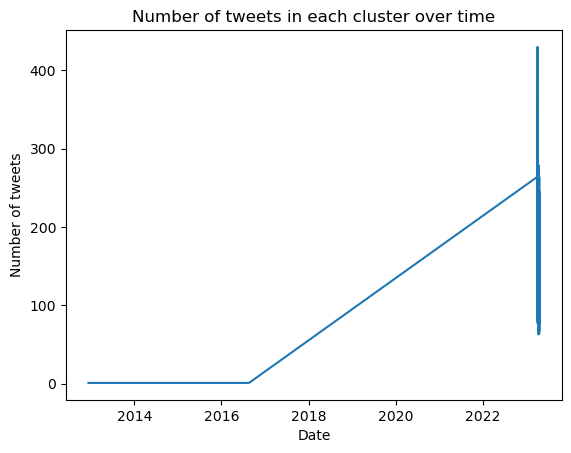

In [58]:
import matplotlib.pyplot as plt

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Plot the number of tweets in each cluster for each day
plt.plot(df_grouped['date'], df_grouped['num_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Number of tweets in each cluster over time')
plt.show()

In [59]:
import plotly.graph_objects as go

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Create an interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_grouped['date'], y=df_grouped['num_tweets'], mode='lines'))

fig.update_layout(
    title='Number of tweets in each cluster over time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of tweets')
)

fig.show()

In [60]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Convert the lists of texts into a single string
text = [' '.join(doc) for doc in df['text']]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Create an NMF model with 5 topics
nmf_model = NMF(n_components=5)
topic_representations = nmf_model.fit_transform(X)

# Perform K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(topic_representations)

# Assign cluster labels to the dataframe
df['cluster'] = clusters

# Print the cluster assignments
print(df[['text', 'cluster']])

C:\Users\sehja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                    text  cluster
0                                   [rt, jexep, chatgpt]        0
1                   [chatgptchrome4, httpstcohfacfe570t]        4
2      [rt, darrelllerner, chatgpt, plugins, fastest,...        0
3      [get, intelligent, chatbot, website, minutes, ...        3
4      [hey, guys, zenithswap, launched, 55000, usd, ...        1
...                                                  ...      ...
21996  [rt, juanvirguezzz, hoy, descubr, chatgpt, lit...        2
21997  [rt, jaimeribafer, detrs, del, chatgpt, httpst...        0
21998  [rt, sudosuberenu, os, presento, una, de, las,...        2
21999  [rt, pmphillips, dangerous, misuse, facts, fic...        0
22001  [chatgpt, wrote, entire, script, video, 2023, ...        4

[12369 rows x 2 columns]


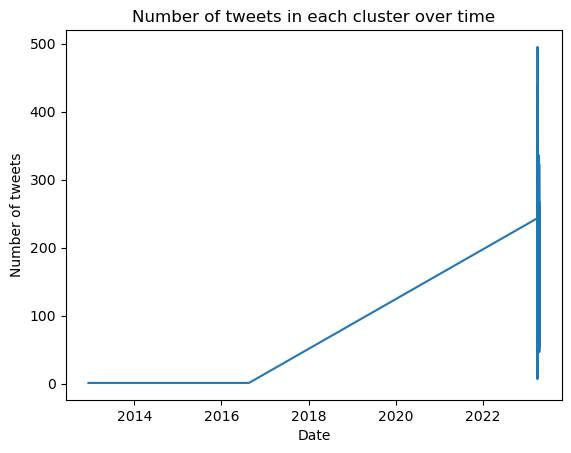

In [61]:
import matplotlib.pyplot as plt

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Plot the number of tweets in each cluster for each day
plt.plot(df_grouped['date'], df_grouped['num_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Number of tweets in each cluster over time')
plt.show()

In [62]:
import plotly.graph_objects as go

# Group the data by date and cluster
df_grouped = df.groupby(['date', 'cluster']).size().reset_index()

# Convert the size Series object to a dataframe
df_grouped['num_tweets'] = df_grouped[0]

# Create an interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_grouped['date'], y=df_grouped['num_tweets'], mode='lines'))

fig.update_layout(
    title='Number of tweets in each cluster over time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of tweets')
)

fig.show()

# Correlation Matrix Heatmap

C:\Users\sehja\AppData\Local\Temp\ipykernel_25912\4002562548.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



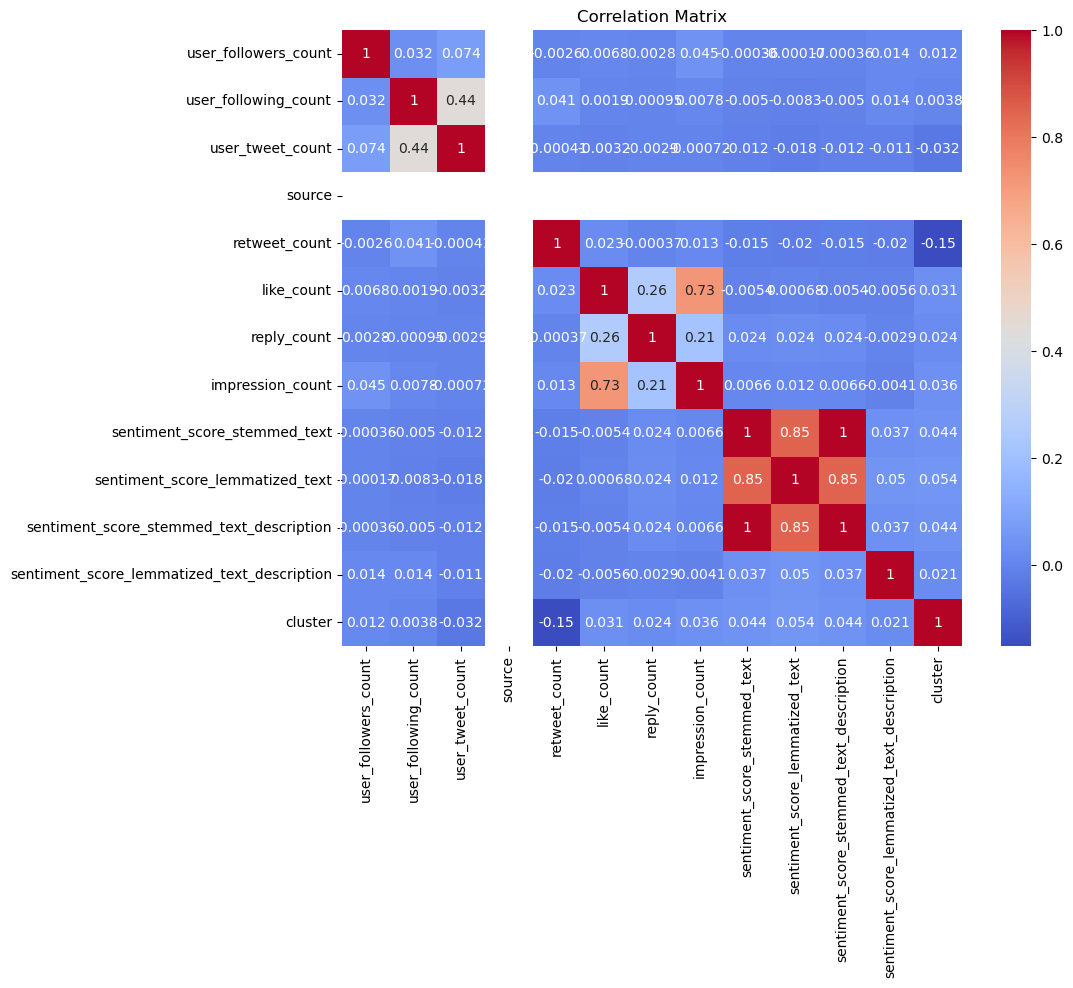

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Using spacy 

In [64]:
import spacy
import pandas as pd


In [65]:
nlp = spacy.load("en_core_web_sm")

In [72]:
from tqdm import tqdm
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

def perform_ner(text_list):
    named_entities_list = []

    with tqdm(total=len(text_list), desc="NER Progress") as pbar:
        for text in text_list:
            doc = nlp(" ".join(text))  # Join the list of strings into a single string
            named_entities = [(entity.text, entity.label_) for entity in doc.ents]
            named_entities_list.append(named_entities)
            pbar.update(1)

    return named_entities_list

for index, row in df.head(5).iterrows():
    text = row['text']
    print("Text:", text)
    named_entities = perform_ner([text])
    print("Named Entities:", named_entities)
    print()


Text: ['rt', 'jexep', 'chatgpt']


NER Progress: 100%|██████████| 1/1 [00:00<00:00, 248.27it/s]


Named Entities: [[('rt jexep chatgpt', 'ORG')]]

Text: ['chatgptchrome4', 'httpstcohfacfe570t']


NER Progress: 100%|██████████| 1/1 [00:00<00:00, 250.03it/s]


Named Entities: [[('chatgptchrome4', 'ORG')]]

Text: ['rt', 'darrelllerner', 'chatgpt', 'plugins', 'fastest', 'way', 'get', 'rich', '2023', 'ive', 'created', 'stepbystep', 'guide', 'showing', 'earn', '10']


NER Progress: 100%|██████████| 1/1 [00:00<00:00, 141.92it/s]


Named Entities: [[('2023', 'DATE'), ('10', 'CARDINAL')]]

Text: ['get', 'intelligent', 'chatbot', 'website', 'minutes', 'chatbase', 'ai', 'train', 'chatgpt', 'data', 'let', 'answer', 'question', 'users', 'simply', 'upload', 'document', 'link', 'add', 'chat', 'widget', 'easy', 'make', 'money', 'using', 'ai', 'httpstcoylheqn4w9t', 'httpstcoba54jvorsm']


NER Progress: 100%|██████████| 1/1 [00:00<00:00, 108.24it/s]


Named Entities: [[('minutes', 'TIME')]]

Text: ['hey', 'guys', 'zenithswap', 'launched', '55000', 'usd', 'marketcap', 'chatgpt', 'dex', 'reimagining', 'defi', 'aipowered', 'yield', 'farming', '4x', 'lot', 'potential', 'low', 'marketcap', 'arb', 'zsp', 'arbitrum', 'httpstco9vwytyzajd']


NER Progress: 100%|██████████| 1/1 [00:00<00:00, 142.89it/s]

Named Entities: [[('55000', 'CARDINAL'), ('4x', 'CARDINAL')]]



# Named Entity Recognition (NER) with spaCy

In [73]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Subset of texts to display
num_samples = 5
sample_texts = df['text'].head(num_samples)

# Lists to store entities and relations
entities_list = []
relations_list = []

for text in sample_texts:
    entities_per_text = []
    relations_per_text = []
    
    for t in text:
        doc = nlp(t)
        
        # Extract named entities and their relationships
        entities = [(entity.text, entity.label_) for entity in doc.ents]
        relations = [(entity.text, entity.root.dep_, entity.root.head.text) for entity in doc.ents]
        
        entities_per_text.extend(entities)
        relations_per_text.extend(relations)
    
    entities_list.append(entities_per_text)
    relations_list.append(relations_per_text)

# Print the extracted entities and relations for each text sample
for i in range(num_samples):
    print("Text:", sample_texts[i])
    print("Named Entities:", entities_list[i])
    print("Relations:", relations_list[i])
    print()


Text: ['rt', 'jexep', 'chatgpt']
Named Entities: []
Relations: []

Text: ['chatgptchrome4', 'httpstcohfacfe570t']
Named Entities: []
Relations: []

Text: ['rt', 'darrelllerner', 'chatgpt', 'plugins', 'fastest', 'way', 'get', 'rich', '2023', 'ive', 'created', 'stepbystep', 'guide', 'showing', 'earn', '10']
Named Entities: [('2023', 'DATE'), ('10', 'CARDINAL')]
Relations: [('2023', 'ROOT', '2023'), ('10', 'ROOT', '10')]

Text: ['get', 'intelligent', 'chatbot', 'website', 'minutes', 'chatbase', 'ai', 'train', 'chatgpt', 'data', 'let', 'answer', 'question', 'users', 'simply', 'upload', 'document', 'link', 'add', 'chat', 'widget', 'easy', 'make', 'money', 'using', 'ai', 'httpstcoylheqn4w9t', 'httpstcoba54jvorsm']
Named Entities: [('chatbot', 'PERSON'), ('minutes', 'TIME'), ('httpstcoba54jvorsm', 'ORG')]
Relations: [('chatbot', 'ROOT', 'chatbot'), ('minutes', 'ROOT', 'minutes'), ('httpstcoba54jvorsm', 'ROOT', 'httpstcoba54jvorsm')]

Text: ['hey', 'guys', 'zenithswap', 'launched', '55000', 'u

In [74]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Dictionary to store entity type frequencies
entity_type_frequencies = {}

for text in df['text']:
    doc = nlp(t)
    entities = [(entity.text, entity.label_) for entity in doc.ents]

    for entity in entities:
        entity_type = entity[1]
        if entity_type in entity_type_frequencies:
            entity_type_frequencies[entity_type] += 1
        else:
            entity_type_frequencies[entity_type] = 1



# Entity-Relationship Extraction with spaCy

In [75]:
import spacy
from tqdm import tqdm

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Initialize entity type frequencies dictionary
entity_type_frequencies = {}

# Iterate over each text in the 'text' column
progress_bar = tqdm(total=len(df['text']), desc="Processing texts", unit="text")
for texts in df['text']:
    for text in texts:
        doc = nlp(text)
        entities = [(entity.text, entity.label_) for entity in doc.ents]

        # Update entity type frequencies
        for entity in entities:
            entity_type = entity[1]
            if entity_type in entity_type_frequencies:
                entity_type_frequencies[entity_type] += 1
            else:
                entity_type_frequencies[entity_type] = 1

    progress_bar.update(1)

progress_bar.close()

# Print the entity type frequencies
print(entity_type_frequencies)

Processing texts: 100%|██████████| 12369/12369 [06:20<00:00, 32.47text/s]

{'DATE': 890, 'CARDINAL': 3796, 'PERSON': 4179, 'TIME': 382, 'ORG': 4589, 'GPE': 2850, 'ORDINAL': 254, 'NORP': 555, 'PRODUCT': 28, 'LOC': 25, 'LAW': 1, 'LANGUAGE': 26, 'QUANTITY': 4, 'WORK_OF_ART': 7, 'EVENT': 2, 'MONEY': 1, 'FAC': 2}


# Entity-Relationship Graph Visualization

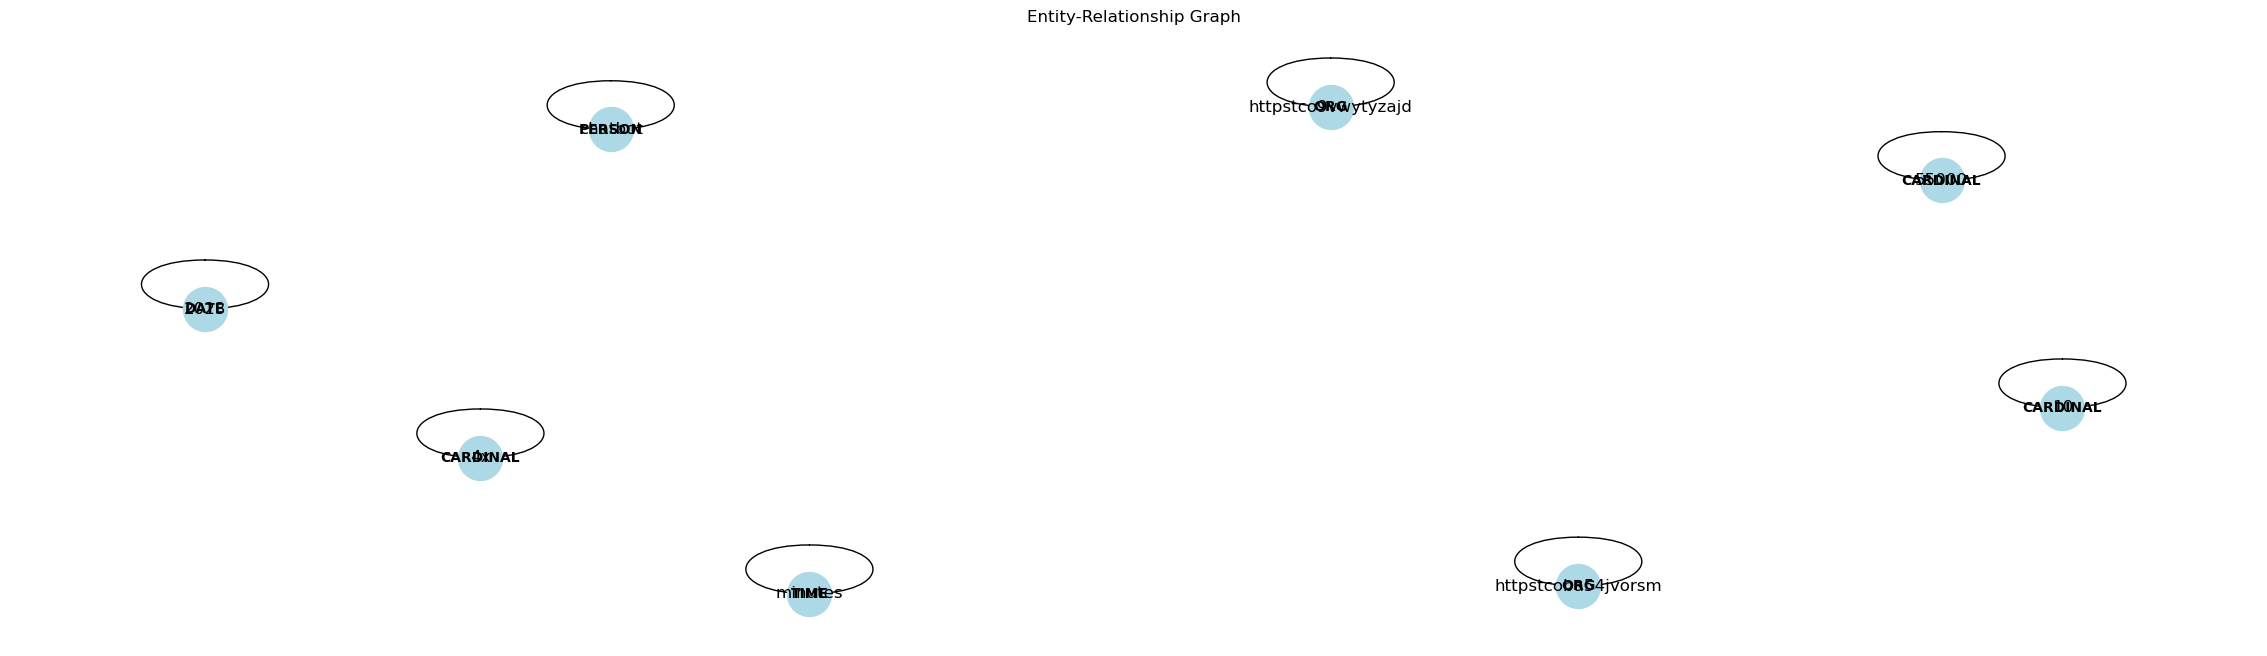

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()

# Add nodes for entities
for entities in entities_list:
    for entity in entities:
        entity_text, entity_type = entity
        graph.add_node(entity_text, label=entity_type)

# Add edges for relationships
for relations in relations_list:
    for relation in relations:
        entity1, relationship, entity2 = relation
        graph.add_edge(entity1, entity2, label=relationship)

# Plot the graph
pos = nx.spring_layout(graph)
labels = nx.get_node_attributes(graph, 'label')
edge_labels = nx.get_edge_attributes(graph, 'label')

plt.figure(figsize=(29, 8))
nx.draw_networkx(graph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12)
nx.draw_networkx_labels(graph, pos, labels, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(graph, pos, edge_labels, font_size=8)
plt.title('Entity-Relationship Graph')
plt.axis('off')
plt.show()

# Tweet Analysis: Scatter Plot with Plotly

In [77]:
import plotly.graph_objects as go

# Entity Type Frequencies
entity_types = list(entity_type_frequencies.keys())
entity_frequencies = list(entity_type_frequencies.values())


# Create bar charts for entity types and relationship types
entity_type_fig = go.Figure(data=[go.Bar(x=entity_types, y=entity_frequencies)])
entity_type_fig.update_layout(title="Entity Type Frequencies", xaxis_title="Entity Type", yaxis_title="Frequency")


# Display the interactive plots
entity_type_fig.show()

# Tweet Analysis: Scatter Plot with Seaborn

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 3651 (\N{THAI CHARACTER SARA AI MAIMUAN}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 23696 (\N{CJK UNIFIED IDEOGRAPH-5C90}) missing from current font.

C:\Users\sehja\anaconda3\lib\site-pa

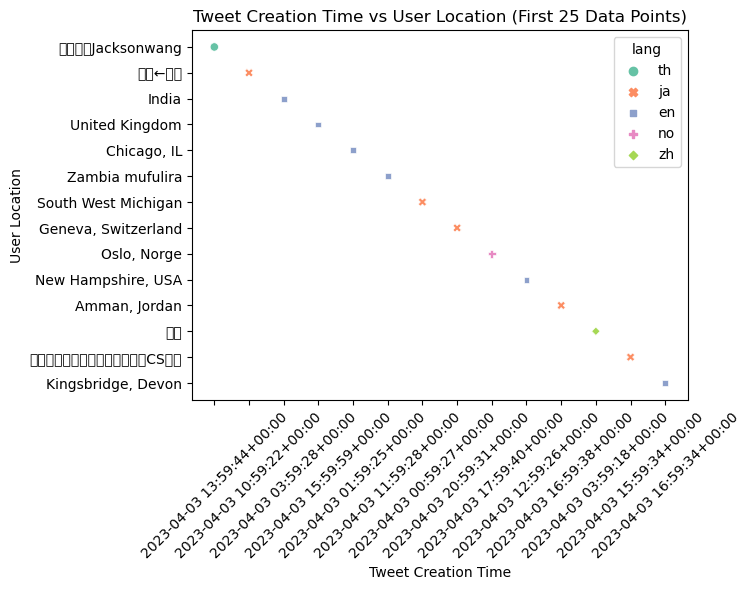

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns from the DataFrame
data = df[['tweet_created', 'lang', 'user_location']].head(25)

# Filter out missing values
data = data.dropna(subset=['lang', 'user_location'])

# Create scatter plot
sns.scatterplot(data=data, x='tweet_created', y='user_location', hue='lang', style='lang', palette='Set2')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Tweet Creation Time vs User Location (First 25 Data Points)')
plt.xlabel('Tweet Creation Time')
plt.ylabel('User Location')

# Display the plot
plt.show()


# User Verification and Location Analysis: Scatter Plot with Seaborn

In [79]:
import plotly.express as px

# Select relevant columns and filter the first 25 rows
data = df[['tweet_created', 'lang', 'user_location']].head(25)

# Filter out missing values
data = data.dropna(subset=['lang', 'user_location'])

# Create interactive scatter plot
fig = px.scatter(data, x='tweet_created', y='user_location', color='lang', symbol='lang',
                 title='Tweet Creation Time vs User Location',
                 labels={'tweet_created': 'Tweet Creation Time', 'user_location': 'User Location'})

# Rotate x-axis labels for better visibility
fig.update_layout(xaxis=dict(tickangle=45))

# Show the interactive plot
fig.show()

# User Verification and Location Analysis: Scatter Plot with Plotly

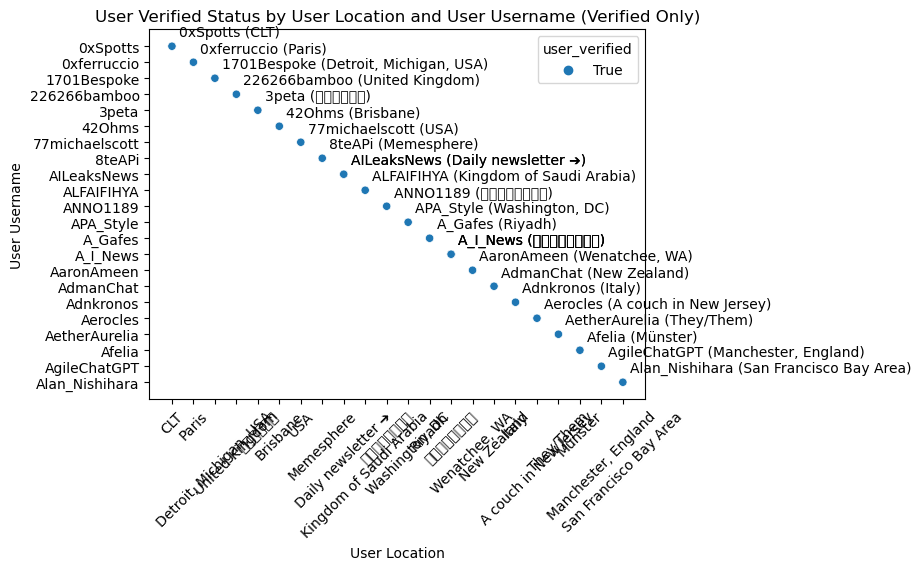

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Select relevant columns from the DataFrame
data = df[['user_verified', 'user_location', 'user_username']]

# Filter out missing values and select only True values in user_verified
data = data.dropna(subset=['user_verified', 'user_location', 'user_username'])
data = data[data['user_verified'] == True]

# Sort the data by user_username
data = data.sort_values('user_username')

# Select the top 25 data points
data_top_50 = data.head(25)

# Create scatter plot
sns.scatterplot(data=data_top_50, x='user_location', y='user_username', hue='user_verified')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('User Verified Status by User Location and User Username (Verified Only)')
plt.xlabel('User Location')
plt.ylabel('User Username')

# Add annotations (tooltips) to the plot
for i, row in data_top_50.iterrows():
    plt.annotate(f"{row['user_username']} ({row['user_location']})", 
                 xy=(row['user_location'], row['user_username']), 
                 xytext=(5, 5), textcoords='offset points', 
                 ha='left', va='bottom')

# Display the plot
plt.show()

# User Verification and Location Analysis: Violin Plot with Plotly

In [81]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Select relevant columns from the DataFrame
data = df[['user_verified', 'user_location', 'user_username']]

# Filter out missing values and select only True values in user_verified
data = data.dropna(subset=['user_verified', 'user_location', 'user_username'])
data = data[data['user_verified'] == True]

# Create violin plot using Plotly
fig = px.violin(data, x='user_location', y='user_username', box=True, points='all',
                labels={'user_location': 'User Location', 'user_username': 'User Username'})

# Set plot title
fig.update_layout(title='Distribution of Usernames across User Locations (Verified Only)')

# Display the plot
fig.show()

# User Verification and Location Analysis: Area Plot with Plotly

In [82]:
import plotly.express as px
import pandas as pd

# Select relevant columns from the DataFrame
data = df[['user_verified', 'user_location', 'user_username']]

# Filter out missing values and select only True values in user_verified
data = data.dropna(subset=['user_verified', 'user_location', 'user_username'])
data = data[data['user_verified'] == True]

# Calculate the count of usernames in each user_location
data_counts = data.groupby('user_location')['user_username'].count().reset_index()

# Create area plot using Plotly
fig = px.area(data_counts, x='user_location', y='user_username',
              labels={'user_location': 'User Location', 'user_username': 'Count'},
              title='Count of Usernames across User Locations (Verified Only)')

# Display the plot
fig.show()

# User Verification and Location Analysis: Bubble Chart with Plotly

In [83]:
import plotly.express as px
import pandas as pd

# Select relevant columns from the DataFrame
data = df[['user_verified', 'user_location', 'user_username']]

# Filter out missing values and select only True values in user_verified
data = data.dropna(subset=['user_verified', 'user_location', 'user_username'])
data = data[data['user_verified'] == True]

# Calculate the count of usernames in each user_location
data_counts = data.groupby('user_location')['user_username'].count().reset_index()

# Create bubble chart using Plotly
fig = px.scatter(data_counts, x='user_location', y='user_username', size='user_username',
                 labels={'user_location': 'User Location', 'user_username': 'Count'},
                 title='Count of Usernames across User Locations (Verified Only)')

# Display the plot
fig.show()

# User Verification and Location Analysis: Treemap with Plotly

In [84]:
import plotly.express as px
import pandas as pd

# Select relevant columns from the DataFrame
data = df[['user_verified', 'user_location', 'user_username']]

# Filter out missing values and select only True values in user_verified
data = data.dropna(subset=['user_verified', 'user_location', 'user_username'])
data = data[data['user_verified'] == True]

# Calculate the count of usernames in each user_location
data_counts = data.groupby('user_location')['user_username'].count().reset_index()

# Create treemap using Plotly
fig = px.treemap(data_counts, path=['user_location'], values='user_username',
                 labels={'user_location': 'User Location', 'user_username': 'Count'},
                 title='Count of Usernames across User Locations (Verified Only)')

# Display the plot
fig.show()